### データの読み込み

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

import lightgbm as lgb
from sklearn.model_selection import train_test_split

In [2]:
dataset=pd.read_csv('preprocessed_data_city.csv')
dataset.shape

(61108, 16)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61108 entries, 0 to 61107
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   物件名     61108 non-null  object 
 1   カテゴリー   61108 non-null  object 
 2   築年数     61108 non-null  int64  
 3   構造      61108 non-null  int64  
 4   階数      61108 non-null  int64  
 5   賃料      61108 non-null  float64
 6   管理費     61108 non-null  float64
 7   敷金      61108 non-null  float64
 8   礼金      61108 non-null  float64
 9   間取り     61108 non-null  object 
 10  面積      61108 non-null  float64
 11  23区     61108 non-null  object 
 12  都市名     61108 non-null  object 
 13  路線      61108 non-null  object 
 14  最寄駅     61108 non-null  object 
 15  徒歩      61108 non-null  int64  
dtypes: float64(5), int64(4), object(7)
memory usage: 7.5+ MB


In [4]:
dataset.head()

,物件名,カテゴリー,築年数,構造,階数,賃料,管理費,敷金,礼金,間取り,面積,23区,都市名,路線,最寄駅,徒歩
0,ＪＲ山手線 大崎駅 3階建 築45年,賃貸マンション,45,3,2,109000.0,0.0,109000.0,109000.0,11LDK,40.00,品川区,北品川５,ＪＲ山手線,大崎駅,10
1,ステージグランデ神楽坂,賃貸マンション,12,8,5,100000.0,5000.0,100000.0,100000.0,1K,25.65,新宿区,改代町,東京メトロ有楽町線,江戸川橋駅,3
2,ステージグランデ神楽坂,賃貸マンション,12,8,7,110000.0,5000.0,110000.0,110000.0,1K,25.65,新宿区,改代町,東京メトロ有楽町線,江戸川橋駅,3
3,ステージグランデ神楽坂,賃貸マンション,12,8,8,145000.0,10000.0,145000.0,145000.0,1LDK,41.08,新宿区,改代町,東京メトロ有楽町線,江戸川橋駅,3
4,ステージグランデ神楽坂,賃貸マンション,12,8,1,150000.0,10000.0,0.0,0.0,1SK,41.86,新宿区,改代町,東京メトロ有楽町線,江戸川橋駅,3


In [5]:
dataset.columns

Index(['物件名', 'カテゴリー', '築年数', '構造', '階数', '賃料', '管理費', '敷金', '礼金', '間取り', '面積',
       '23区', '都市名', '路線', '最寄駅', '徒歩'],
      dtype='object')

In [6]:
cols=['物件名', 'カテゴリー', '間取り','23区', '都市名', '路線', '最寄駅']
for col in cols:
    dataset[col]=dataset[col].astype('category')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61108 entries, 0 to 61107
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   物件名     61108 non-null  category
 1   カテゴリー   61108 non-null  category
 2   築年数     61108 non-null  int64   
 3   構造      61108 non-null  int64   
 4   階数      61108 non-null  int64   
 5   賃料      61108 non-null  float64 
 6   管理費     61108 non-null  float64 
 7   敷金      61108 non-null  float64 
 8   礼金      61108 non-null  float64 
 9   間取り     61108 non-null  category
 10  面積      61108 non-null  float64 
 11  23区     61108 non-null  category
 12  都市名     61108 non-null  category
 13  路線      61108 non-null  category
 14  最寄駅     61108 non-null  category
 15  徒歩      61108 non-null  int64   
dtypes: category(7), float64(5), int64(4)
memory usage: 5.5 MB


In [7]:
#説明変数と目的変数
X=dataset.drop(['物件名', '賃料', '管理費', '敷金', '礼金'], axis=1)
y=dataset['賃料']

In [9]:
#訓練用、検証用、テスト用に分割
train_val_X, test_X, train_val_y, test_y=train_test_split(X, y, test_size=0.2, random_state=20221005)
train_X, val_X, train_y, val_y=train_test_split(train_val_X, train_val_y, test_size=0.2, random_state=20221005)

In [15]:
from optuna.integration import lightgbm as lgb_o

trains=lgb.Dataset(train_X, train_y)
vals=lgb.Dataset(val_X, val_y)

# 固定するパラメータ
params = {
#     "boosting_type": "gbdt",
    'objective': 'regression_l1',
    'metric': 'l1',
#     "verbosity": 100,
    "num_iterations": 10000
}

# Optunaでのパラメータ探索
model = lgb_o.train(params, trains, 
                  valid_sets=[trains, vals],
                  num_boost_round=10000,
                  verbose_eval=100,
                  early_stopping_rounds=100,
                 )


[I 2022-10-05 17:10:54,184] A new study created in memory with name: no-name-efd34753-f93c-40b2-8f49-67094336f839
feature_fraction, val_score: inf:   0%|                   | 0/7 [00:00<?, ?it/s]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of Light

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006804 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds


/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[100]	valid_0's l1: 8142.11	valid_1's l1: 8677.74
[200]	valid_0's l1: 6813.87	valid_1's l1: 7623.43
[300]	valid_0's l1: 6128.52	valid_1's l1: 7071.52
[400]	valid_0's l1: 5689.37	valid_1's l1: 6715.91
[500]	valid_0's l1: 5377.06	valid_1's l1: 6490.38
[600]	valid_0's l1: 5113.41	valid_1's l1: 6295.01
[700]	valid_0's l1: 4923.09	valid_1's l1: 6172.87
[800]	valid_0's l1: 4769.97	valid_1's l1: 6058.68
[900]	valid_0's l1: 4649.54	valid_1's l1: 5981.27
[1000]	valid_0's l1: 4538.1	valid_1's l1: 5903.2
[1100]	valid_0's l1: 4431.19	valid_1's l1: 5829.68
[1200]	valid_0's l1: 4351.1	valid_1's l1: 5777.63
[1300]	valid_0's l1: 4277.67	valid_1's l1: 5721.41
[1400]	valid_0's l1: 4215.55	valid_1's l1: 5674.91
[1500]	valid_0's l1: 4143.52	valid_1's l1: 5625.5
[1600]	valid_0's l1: 4081.67	valid_1's l1: 5583.99
[1700]	valid_0's l1: 4015.81	valid_1's l1: 5530.95
[1800]	valid_0's l1: 3971.58	valid_1's l1: 5506.74
[1900]	valid_0's l1: 3927.17	valid_1's l1: 5477.18
[2000]	valid_0's l1: 3884.11	valid_1's l1: 5

feature_fraction, val_score: 4720.106784:  14%|4  | 1/7 [01:08<06:48, 68.06s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003933 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 8524.04	valid_1's l1: 9045.24
[200]	valid_0's l1: 7057.11	valid_1's l1: 7853.89
[300]	valid_0's l1: 6405.23	valid_1's l1: 7288.87
[400]	valid_0's l1: 5932.16	valid_1's l1: 6921.86
[500]	valid_0's l1: 5542.72	valid_1's l1: 6590.58
[600]	valid_0's l1: 5280.78	valid_1's l1: 6372.82
[700]	valid_0's l1: 5077.3	valid_1's l1: 6220.15
[800]	valid_0's l1: 4896.6	valid_1's l1: 6099.42
[900]	valid_0's l1: 4754.3	valid_1's l1: 5997.64
[1000]	valid_0's l1: 4628.42	valid_1's l1: 5914.97
[1100]	valid_0's l1: 4506.49	valid_1's l1: 5838.27
[1200]	valid_0's l1: 4421.11	valid_1's 

feature_fraction, val_score: 4686.857224:  29%|8  | 2/7 [02:10<05:24, 64.83s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005014 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 7297.99	valid_1's l1: 7890.46
[200]	valid_0's l1: 6385.1	valid_1's l1: 7159.54
[300]	valid_0's l1: 5977.04	valid_1's l1: 6839.12
[400]	valid_0's l1: 5684.45	valid_1's l1: 6620.18
[500]	valid_0's l1: 5445.12	valid_1's l1: 6471.46
[600]	valid_0's l1: 5234.36	valid_1's l1: 6288.78
[700]	valid_0's l1: 5070.11	valid_1's l1: 6175.54
[800]	valid_0's l1: 4929.12	valid_1's l1: 6058.36
[900]	valid_0's l1: 4812.76	valid_1's l1: 5963.66
[1000]	valid_0's l1: 4710.98	valid_1's l1: 5898.77
[1100]	valid_0's l1: 4606.4	valid_1's l1: 5810.04
[1200]	valid_0's l1: 4546.74	valid_1's

feature_fraction, val_score: 4686.857224:  43%|#2 | 3/7 [03:14<04:17, 64.28s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 7953.56	valid_1's l1: 8400.98
[200]	valid_0's l1: 6691.75	valid_1's l1: 7423.64
[300]	valid_0's l1: 6131.18	valid_1's l1: 7041.99
[400]	valid_0's l1: 5689.33	valid_1's l1: 6639.71
[500]	valid_0's l1: 5391.43	valid_1's l1: 6390.11
[600]	valid_0's l1: 5169.16	valid_1's l1: 6217.46
[700]	valid_0's l1: 4965.38	valid_1's l1: 6062.23
[800]	valid_0's l1: 4820.83	valid_1's l1: 5973.22
[900]	valid_0's l1: 4711.24	valid_1's l1: 5897.74
[1000]	valid_0's l1: 4625.73	valid_1's l1: 5840.78
[1100]	valid_0's l1: 4526.84	valid_1's l1: 5758.05
[1200]	valid_0's l1: 4434.56	valid_1

feature_fraction, val_score: 4587.392070:  57%|#7 | 4/7 [04:16<03:10, 63.36s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006883 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 7834.97	valid_1's l1: 8289.06
[200]	valid_0's l1: 6405.4	valid_1's l1: 7044.45
[300]	valid_0's l1: 5876.26	valid_1's l1: 6664.51
[400]	valid_0's l1: 5510.29	valid_1's l1: 6373.07
[500]	valid_0's l1: 5259.3	valid_1's l1: 6167.21
[600]	valid_0's l1: 5048.57	valid_1's l1: 6009.56
[700]	valid_0's l1: 4835.39	valid_1's l1: 5830.91
[800]	valid_0's l1: 4686.85	valid_1's l1: 5741.81
[900]	valid_0's l1: 4597.43	valid_1's l1: 5690.36
[1000]	valid_0's l1: 4478.45	valid_1's l1: 5605.48
[1100]	valid_0's l1: 4398.79	valid_1's l1: 5557.57
[1200]	valid_0's l1: 4302.13	valid_1's

feature_fraction, val_score: 4577.355088:  71%|##1| 5/7 [05:29<02:14, 67.06s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 7930.47	valid_1's l1: 8348.14
[200]	valid_0's l1: 6661.93	valid_1's l1: 7337.27
[300]	valid_0's l1: 6089.96	valid_1's l1: 6851.83
[400]	valid_0's l1: 5661.16	valid_1's l1: 6507.96
[500]	valid_0's l1: 5394.68	valid_1's l1: 6308.76
[600]	valid_0's l1: 5181.55	valid_1's l1: 6123.96
[700]	valid_0's l1: 4990.91	valid_1's l1: 5971.15
[800]	valid_0's l1: 4838.28	valid_1's l1: 5851.86
[900]	valid_0's l1: 4709.83	valid_1's l1: 5770.86
[1000]	valid_0's l1: 4591.87	valid_1's l1: 5684.44
[1100]	valid_0's l1: 44

feature_fraction, val_score: 4462.255133:  86%|##5| 6/7 [06:53<01:12, 72.85s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004628 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 7743.16	valid_1's l1: 8422.9
[200]	valid_0's l1: 6364.64	valid_1's l1: 7193.09
[300]	valid_0's l1: 5846.54	valid_1's l1: 6791.2
[400]	valid_0's l1: 5533.09	valid_1's l1: 6518.87
[500]	valid_0's l1: 5340.56	valid_1's l1: 6368.62
[600]	valid_0's l1: 5196.56	valid_1's l1: 6275.78
[700]	valid_0's l1: 5008.9	valid_1's l1: 6130.96
[800]	valid_0's l1: 4831.81	valid_1's l1: 5988.82
[900]	valid_0's l1: 4708.97	valid_1's l1: 5890.29
[1000]	valid_0's l1: 4598.42	valid_1's l1: 5811.86
[1100]	valid_0's l1: 4502.02	valid_1's l1: 5734.33
[1200]	valid_0's l1: 4421.43	valid_1's 

num_leaves, val_score: 4462.255133:   0%|                | 0/20 [00:00<?, ?it/s]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 5128.81	valid_1's l1: 6134.54
[200]	valid_0's l1: 4126.52	valid_1's l1: 5339.65
[300]	valid_0's l1: 3646.67	valid_1's l1: 4996.29
[400]	valid_0's l1: 3399.44	valid_1's l1: 4851.24
[500]	valid_0's l1: 3212.54	valid_1's l1: 4720
[600]	valid_0's l1: 3074.16	valid_1's l1: 4639.64
[700]	valid_0's l1: 2951.54	valid_1's l1: 4569.27
[800]	valid_0's l1: 2855.84	valid_1's l1: 4518.33
[900]	valid_0's l1: 2781.76	valid_1's l1: 4478.04
[1000]	valid_0's l1: 2710.71	valid_1's l1: 4431.93
[1100]	valid_0's l1: 2655.

num_leaves, val_score: 3914.690079:   5%|2    | 1/20 [04:19<1:22:01, 259.02s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 5222.82	valid_1's l1: 6277.13
[200]	valid_0's l1: 3979.4	valid_1's l1: 5337.84
[300]	valid_0's l1: 3580.95	valid_1's l1: 5071.69
[400]	valid_0's l1: 3333.73	valid_1's l1: 4905.85
[500]	valid_0's l1: 3159.95	valid_1's l1: 4803.09
[600]	valid_0's l1: 3033.87	valid_1's l1: 4725.78
[700]	valid_0's l1: 2933.52	valid_1's l1: 4676.87
[800]	valid_0's l1: 2836.66	valid_1's l1: 4618.78
[900]	valid_0's l1: 2766.41	valid_1's l1: 4577.9
[1000]	valid_0's l1: 2709.62	valid_1's l1: 4541.07
[1100]	valid_0's l1: 2657

num_leaves, val_score: 3914.690079:  10%|5    | 2/20 [08:36<1:17:27, 258.20s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 10105.2	valid_1's l1: 10331.7
[200]	valid_0's l1: 8279.4	valid_1's l1: 8710.22
[300]	valid_0's l1: 7635.08	valid_1's l1: 8158.2
[400]	valid_0's l1: 7062.06	valid_1's l1: 7723.42
[500]	valid_0's l1: 6702.49	valid_1's l1: 7423.28
[600]	valid_0's l1: 6479.63	valid_1's l1: 7243.4
[700]	valid_0's l1: 6353.77	valid_1's l1: 7147
[800]	valid_0's l1: 6180.17	valid_1's l1: 7012.06
[900]	valid_0's l1: 6032.12	valid_1's l1: 6886.62
[1000]	valid_0's l1: 5840.95	valid_1's l1: 6726.44
[1100]	valid_0's l1: 5688.39	

num_leaves, val_score: 3914.690079:  15%|#      | 3/20 [09:24<45:56, 162.14s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 6456.78	valid_1's l1: 7265.4
[200]	valid_0's l1: 5186.93	valid_1's l1: 6218.92
[300]	valid_0's l1: 4584.26	valid_1's l1: 5699.5
[400]	valid_0's l1: 4260.44	valid_1's l1: 5448.36
[500]	valid_0's l1: 4048.34	valid_1's l1: 5309.52
[600]	valid_0's l1: 3886.42	valid_1's l1: 5189.36
[700]	valid_0's l1: 3739.13	valid_1's l1: 5081.53
[800]	valid_0's l1: 3625.36	valid_1's l1: 5004.54
[900]	valid_0's l1: 3532.42	valid_1's l1: 4939.2
[1000]	valid_0's l1: 3444.43	valid_1's l1: 4877.6
[1100]	valid_0's l1: 3372.4

num_leaves, val_score: 3914.690079:  20%|#4     | 4/20 [11:26<38:58, 146.14s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006478 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 5083.29	valid_1's l1: 6095.36
[200]	valid_0's l1: 3977.33	valid_1's l1: 5223.56
[300]	valid_0's l1: 3558.36	valid_1's l1: 4950.05
[400]	valid_0's l1: 3330.23	valid_1's l1: 4811.96
[500]	valid_0's l1: 3166.16	valid_1's l1: 4709.91
[600]	valid_0's l1: 3050.27	valid_1's l1: 4636.8
[700]	valid_0's l1: 2957.85	valid_1's l1: 4574.59
[800]	valid_0's l1: 2881.18	valid_1's l1: 4529.41
[900]	valid_0's l1: 2816.92	valid_1's l1: 4482.85
[1000]	valid_0's l1: 2752.58	valid_1's l1: 4436.63
[1100]	valid_0's l1: 2700.34	valid_1's l1: 4410.77
[1200]	valid_0's l1: 2649.79	valid_1'

num_leaves, val_score: 3906.536325:  25%|#7     | 5/20 [16:04<48:28, 193.90s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005774 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 5663.15	valid_1's l1: 6635.68
[200]	valid_0's l1: 4392.92	valid_1's l1: 5589.56
[300]	valid_0's l1: 3944.81	valid_1's l1: 5274.94
[400]	valid_0's l1: 3659.38	valid_1's l1: 5101.75
[500]	valid_0's l1: 3467.74	valid_1's l1: 4984.74
[600]	valid_0's l1: 3337.51	valid_1's l1: 4898.75
[700]	valid_0's l1: 3214.15	valid_1's l1: 4818.97
[800]	valid_0's l1: 3119.65	valid_1's l1: 4755.87
[900]	valid_0's l1: 3048.68	valid_1's l1: 4712.9
[1000]	valid_0's l1: 2977.15	valid_1's l1: 4666.37
[1100]	valid_0's l1: 2914.99	valid_1's l1: 4632.92
[1200]	valid_0's l1: 2862.1	valid_1's

num_leaves, val_score: 3906.536325:  30%|##1    | 6/20 [18:55<43:23, 185.96s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 5655.51	valid_1's l1: 6573.45
[200]	valid_0's l1: 4574.15	valid_1's l1: 5713.33
[300]	valid_0's l1: 4108.8	valid_1's l1: 5378.65
[400]	valid_0's l1: 3788.99	valid_1's l1: 5131.92
[500]	valid_0's l1: 3573.95	valid_1's l1: 4972.84
[600]	valid_0's l1: 3407.44	valid_1's l1: 4857.73
[700]	valid_0's l1: 3264.93	valid_1's l1: 4759.93
[800]	valid_0's l1: 3176.8	valid_1's l1: 4703.62
[900]	valid_0's l1: 3106.79	valid_1's l1: 4657.93
[1000]	valid_0's l1: 3038.24	valid_1's l1: 4615.18
[1100]	valid_0's l1: 2981

num_leaves, val_score: 3906.536325:  35%|##4    | 7/20 [22:07<40:44, 188.03s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 5667.78	valid_1's l1: 6646.44
[200]	valid_0's l1: 4473.47	valid_1's l1: 5611.79
[300]	valid_0's l1: 3972.41	valid_1's l1: 5261.76
[400]	valid_0's l1: 3681.02	valid_1's l1: 5069.01
[500]	valid_0's l1: 3485.2	valid_1's l1: 4952.62
[600]	valid_0's l1: 3339.17	valid_1's l1: 4864.13
[700]	valid_0's l1: 3220.68	valid_1's l1: 4781.87
[800]	valid_0's l1: 3120.12	valid_1's l1: 4711.85
[900]	valid_0's l1: 3048.05	valid_1's l1: 4669.18
[1000]	valid_0's l1: 2977.39	valid_1's l1: 4625.46
[1100]	valid_0's l1: 291

num_leaves, val_score: 3906.536325:  40%|##8    | 8/20 [25:13<37:26, 187.22s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000971 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 5427.82	valid_1's l1: 6259.58
[200]	valid_0's l1: 4315.27	valid_1's l1: 5401.51
[300]	valid_0's l1: 3816.52	valid_1's l1: 5053.42
[400]	valid_0's l1: 3536.13	valid_1's l1: 4873.66
[500]	valid_0's l1: 3364.22	valid_1's l1: 4771.61
[600]	valid_0's l1: 3228.18	valid_1's l1: 4687.71
[700]	valid_0's l1: 3114.4	valid_1's l1: 4619.13
[800]	valid_0's l1: 3017.7	valid_1's l1: 4560.63
[900]	valid_0's l1: 2944.07	valid_1's l1: 4519.78
[1000]	valid_0's l1: 2885.44	valid_1's l1: 4482.27
[1100]	valid_0's l1: 2830

num_leaves, val_score: 3906.536325:  45%|###1   | 9/20 [28:35<35:10, 191.90s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005537 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 5319.18	valid_1's l1: 6383.92
[200]	valid_0's l1: 4216.53	valid_1's l1: 5557.62
[300]	valid_0's l1: 3687.49	valid_1's l1: 5208.46
[400]	valid_0's l1: 3425.94	valid_1's l1: 5041.52
[500]	valid_0's l1: 3235.91	valid_1's l1: 4926.92
[600]	valid_0's l1: 3107.94	valid_1's l1: 4847.43
[700]	valid_0's l1: 3001.52	valid_1's l1: 4788.42
[800]	valid_0's l1: 2910.5	valid_1's l1: 4727.19
[900]	valid_0's l1: 2846.32	valid_1's l1: 4686.07
[1000]	valid_0's l1: 2779.42	valid_1's l1: 4646.17
[1100]	valid_0's l1: 2724.63	valid_1's l1: 4614.32
[1200]	valid_0's l1: 2677.59	valid_1'

num_leaves, val_score: 3906.536325:  50%|###   | 10/20 [31:33<31:15, 187.57s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 5009.17	valid_1's l1: 6060.29
[200]	valid_0's l1: 3873.03	valid_1's l1: 5209.84
[300]	valid_0's l1: 3450.47	valid_1's l1: 4932.8
[400]	valid_0's l1: 3239.49	valid_1's l1: 4801.57
[500]	valid_0's l1: 3084.97	valid_1's l1: 4708.27
[600]	valid_0's l1: 2959.86	valid_1's l1: 4627.53
[700]	valid_0's l1: 2856.1	valid_1's l1: 4558.8
[800]	valid_0's l1: 2777.99	valid_1's l1: 4510.63
[900]	valid_0's l1: 2717.96	valid_1's l1: 4478.08
[1000]	valid_0's l1: 2660.02	valid_1's l1: 4438.83
[1100]	valid_0's l1: 2609.

num_leaves, val_score: 3906.536325:  55%|###3  | 11/20 [35:34<30:37, 204.12s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 5119.91	valid_1's l1: 6222.31
[200]	valid_0's l1: 3972.01	valid_1's l1: 5353.24
[300]	valid_0's l1: 3530.65	valid_1's l1: 5061.43
[400]	valid_0's l1: 3286.74	valid_1's l1: 4903.24
[500]	valid_0's l1: 3101.19	valid_1's l1: 4784.37
[600]	valid_0's l1: 2959.51	valid_1's l1: 4699.13
[700]	valid_0's l1: 2854.1	valid_1's l1: 4626.66
[800]	valid_0's l1: 2772.17	valid_1's l1: 4576.36
[900]	valid_0's l1: 2704.48	valid_1's l1: 4525.23
[1000]	valid_0's l1: 2642.85	valid_1's l1: 4483.84
[1100]	valid_0's l1: 259

num_leaves, val_score: 3906.536325:  60%|###6  | 12/20 [39:25<28:17, 212.14s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 5289.12	valid_1's l1: 6341.2
[200]	valid_0's l1: 4109.11	valid_1's l1: 5340.52
[300]	valid_0's l1: 3683.07	valid_1's l1: 5059.64
[400]	valid_0's l1: 3444.89	valid_1's l1: 4908.57
[500]	valid_0's l1: 3230.73	valid_1's l1: 4768.8
[600]	valid_0's l1: 3084.21	valid_1's l1: 4677.84
[700]	valid_0's l1: 2968.88	valid_1's l1: 4599.41
[800]	valid_0's l1: 2874.35	valid_1's l1: 4544.07
[900]	valid_0's l1: 2806.82	valid_1's l1: 4505.36
[1000]	valid_0's l1: 2742.81	valid_1's l1: 4465.7
[1100]	valid_0's l1: 2684.

num_leaves, val_score: 3906.536325:  65%|###9  | 13/20 [43:50<26:37, 228.25s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005977 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 5354.72	valid_1's l1: 6395.68
[200]	valid_0's l1: 4198.25	valid_1's l1: 5548.01
[300]	valid_0's l1: 3742.92	valid_1's l1: 5209.83
[400]	valid_0's l1: 3485.2	valid_1's l1: 5042.04
[500]	valid_0's l1: 3296.35	valid_1's l1: 4918.66
[600]	valid_0's l1: 3150.34	valid_1's l1: 4813.39
[700]	valid_0's l1: 3028.2	valid_1's l1: 4733.68
[800]	valid_0's l1: 2936.7	valid_1's l1: 4666.73
[900]	valid_0's l1: 2872.66	valid_1's l1: 4631.46
[1000]	valid_0's l1: 2816.26	valid_1's l1: 4596.13
[1100]	valid_0's l1: 2763.56	valid_1's l1: 4561.65
[1200]	valid_0's l1: 2710.73	valid_1's 

num_leaves, val_score: 3906.536325:  70%|####1 | 14/20 [46:45<21:12, 212.12s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 5085.24	valid_1's l1: 6094.08
[200]	valid_0's l1: 3997.61	valid_1's l1: 5249.32
[300]	valid_0's l1: 3575.46	valid_1's l1: 4948.91
[400]	valid_0's l1: 3335.94	valid_1's l1: 4789.14
[500]	valid_0's l1: 3174.19	valid_1's l1: 4685.8
[600]	valid_0's l1: 3042.06	valid_1's l1: 4596.25
[700]	valid_0's l1: 2930.39	valid_1's l1: 4527.69
[800]	valid_0's l1: 2843.22	valid_1's l1: 4474.35
[900]	valid_0's l1: 2778.27	valid_1's l1: 4427.21
[1000]	valid_0's l1: 2722.57	valid_1's l1: 4397.89
[1100]	valid_0's l1: 266

num_leaves, val_score: 3906.536325:  75%|####5 | 15/20 [49:05<15:52, 190.46s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 6116.96	valid_1's l1: 6758.82
[200]	valid_0's l1: 4916.86	valid_1's l1: 5849.5
[300]	valid_0's l1: 4396.64	valid_1's l1: 5454.66
[400]	valid_0's l1: 4093.49	valid_1's l1: 5233.08
[500]	valid_0's l1: 3838.01	valid_1's l1: 5063.3
[600]	valid_0's l1: 3696.5	valid_1's l1: 4970.79
[700]	valid_0's l1: 3580.89	valid_1's l1: 4893.75
[800]	valid_0's l1: 3466.28	valid_1's l1: 4827.64
[900]	valid_0's l1: 3384.09	valid_1's l1: 4778.75
[1000]	valid_0's l1: 3302.97	valid_1's l1: 4720.42
[1100]	valid_0's l1: 3237.

num_leaves, val_score: 3906.536325:  80%|####8 | 16/20 [50:46<10:54, 163.54s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 5381.54	valid_1's l1: 6362.06
[200]	valid_0's l1: 4213.07	valid_1's l1: 5460.85
[300]	valid_0's l1: 3742.63	valid_1's l1: 5131.64
[400]	valid_0's l1: 3503.19	valid_1's l1: 4991.01
[500]	valid_0's l1: 3323.74	valid_1's l1: 4878.15
[600]	valid_0's l1: 3167.53	valid_1's l1: 4770.37
[700]	valid_0's l1: 3044.5	valid_1's l1: 4684
[800]	valid_0's l1: 2945.34	valid_1's l1: 4615.73
[900]	valid_0's l1: 2876.35	valid_1's l1: 4576.29
[1000]	valid_0's l1: 2814.21	valid_1's l1: 4530
[1100]	valid_0's l1: 2756.27	v

num_leaves, val_score: 3906.536325:  85%|#####1| 17/20 [53:08<07:50, 156.88s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 5085.24	valid_1's l1: 6094.08
[200]	valid_0's l1: 3997.61	valid_1's l1: 5249.32
[300]	valid_0's l1: 3575.46	valid_1's l1: 4948.91
[400]	valid_0's l1: 3335.94	valid_1's l1: 4789.14
[500]	valid_0's l1: 3174.19	valid_1's l1: 4685.8
[600]	valid_0's l1: 3042.06	valid_1's l1: 4596.25
[700]	valid_0's l1: 2930.39	valid_1's l1: 4527.69
[800]	valid_0's l1: 2843.22	valid_1's l1: 4474.35
[900]	valid_0's l1: 2778.27	valid_1's l1: 4427.21
[1000]	valid_0's l1: 2722.57	valid_1's l1: 4397.89
[1100]	valid_0's l1: 266

num_leaves, val_score: 3906.536325:  90%|#####4| 18/20 [55:07<04:51, 145.73s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 8452.63	valid_1's l1: 8747.55
[200]	valid_0's l1: 6905.09	valid_1's l1: 7516.96
[300]	valid_0's l1: 6367.83	valid_1's l1: 7069.77
[400]	valid_0's l1: 5974.21	valid_1's l1: 6758.35
[500]	valid_0's l1: 5661.3	valid_1's l1: 6482.27
[600]	valid_0's l1: 5408.9	valid_1's l1: 6273.72
[700]	valid_0's l1: 5158.09	valid_1's l1: 6068.33
[800]	valid_0's l1: 4975.84	valid_1's l1: 5937.61
[900]	valid_0's l1: 4848.73	valid_1's l1: 5847.58
[1000]	valid_0's l1: 4704.95	valid_1's l1: 5742.54
[1100]	valid_0's l1: 4593

num_leaves, val_score: 3906.536325:  95%|#####6| 19/20 [56:04<01:59, 119.07s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 5319.18	valid_1's l1: 6383.92
[200]	valid_0's l1: 4216.53	valid_1's l1: 5557.62
[300]	valid_0's l1: 3687.49	valid_1's l1: 5208.46
[400]	valid_0's l1: 3425.94	valid_1's l1: 5041.52
[500]	valid_0's l1: 3235.91	valid_1's l1: 4926.92
[600]	valid_0's l1: 3107.94	valid_1's l1: 4847.43
[700]	valid_0's l1: 3001.52	valid_1's l1: 4788.42
[800]	valid_0's l1: 2910.5	valid_1's l1: 4727.19
[900]	valid_0's l1: 2846.32	valid_1's l1: 4686.07
[1000]	valid_0's l1: 2779.42	valid_1's l1: 4646.17
[1100]	valid_0's l1: 272

bagging, val_score: 3906.536325:   0%|                   | 0/10 [00:00<?, ?it/s]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's l1: 6502.72	valid_1's l1: 7090.11
[200]	valid_0's l1: 5155.21	valid_1's l1: 6140.82
[300]	valid_0's l1: 4552.93	valid_1's l1: 5693.81
[400]	valid_0's l1: 4209.18	valid_1's l1: 5480.23
[500]	valid_0's l1: 3980.03	valid_1's l1: 5313.26
[600]	valid_0's l1: 3808.52	valid_1's l1: 5194.5
[700]	valid_0's l1: 3654.07	valid_1's l1: 5070.85
[800]	valid_0's l1: 3528.

bagging, val_score: 3906.536325:  10%|#         | 1/10 [03:18<29:44, 198.23s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 5565.73	valid_1's l1: 6455.98
[200]	valid_0's l1: 4426.22	valid_1's l1: 5664.68
[300]	valid_0's l1: 3880.69	valid_1's l1: 5272.19
[400]	valid_0's l1: 3610.1	valid_1's l1: 5102.19
[500]	valid_0's l1: 3427.41	valid_1's l1: 4981.18
[600]	valid_0's l1: 3282.49	valid_1's l1: 4879.16
[700]	valid_0's l1: 3165.86	valid_1's l1: 4811.4
[800]	valid_0's l1: 3065.82	valid_1's l1: 4756.75
[900]	valid_0's l1: 2993.37	valid_1's l1: 4714.47
[1000]	valid_0's l1: 2917.85	valid_1's l1: 4664.15
[1100]	valid_0's l1: 2860

bagging, val_score: 3906.536325:  20%|##        | 2/10 [06:31<26:04, 195.50s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008578 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 5745.58	valid_1's l1: 6580.35
[200]	valid_0's l1: 4480.34	valid_1's l1: 5676.24
[300]	valid_0's l1: 3982.01	valid_1's l1: 5299
[400]	valid_0's l1: 3685.04	valid_1's l1: 5094.9
[500]	valid_0's l1: 3487.9	valid_1's l1: 4984.72
[600]	valid_0's l1: 3347.61	valid_1's l1: 4903.93
[700]	valid_0's l1: 3237.42	valid_1's l1: 4832.06
[800]	valid_0's l1: 3145.73	valid_1's l1: 4771.52
[900]	valid_0's l1: 3066.34	valid_1's l1: 4728.43
[1000]	valid_0's l1: 2990.74	valid_1's l1: 4680.77
[1100]	valid_0's l1: 2926.85	valid_1's l1: 4636.61
[1200]	valid_0's l1: 2868.78	valid_1's l1

bagging, val_score: 3906.536325:  30%|###       | 3/10 [09:28<21:49, 187.02s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 5220.34	valid_1's l1: 6313.41
[200]	valid_0's l1: 4070.41	valid_1's l1: 5431.89
[300]	valid_0's l1: 3634.05	valid_1's l1: 5104.49
[400]	valid_0's l1: 3404.87	valid_1's l1: 4945.52
[500]	valid_0's l1: 3227.09	valid_1's l1: 4818.47
[600]	valid_0's l1: 3099.28	valid_1's l1: 4738.39
[700]	valid_0's l1: 2994.48	valid_1's l1: 4672.31
[800]	valid_0's l1: 2911.05	valid_1's l1: 4614.42
[900]	valid_0's l1: 2842.2	valid_1's l1: 4569.47
[1000]	valid_0's l1: 2773.37	valid_1's l1: 4523.12
[1100]	valid_0's l1: 271

bagging, val_score: 3906.536325:  40%|####      | 4/10 [12:37<18:44, 187.48s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 5911.1	valid_1's l1: 6890.27
[200]	valid_0's l1: 4607.29	valid_1's l1: 5977.08
[300]	valid_0's l1: 4086.58	valid_1's l1: 5565.91
[400]	valid_0's l1: 3761.22	valid_1's l1: 5330.9
[500]	valid_0's l1: 3525.94	valid_1's l1: 5149.17
[600]	valid_0's l1: 3363.25	valid_1's l1: 5042.65
[700]	valid_0's l1: 3255.77	valid_1's l1: 4977.15
[800]	valid_0's l1: 3153.13	valid_1's l1: 4898.97
[900]	valid_0's l1: 3079.96	valid_1's l1: 4851.08
[1000]	valid_0's l1: 3013.6	valid_1's l1: 4803.66
[1100]	valid_0's l1: 2953.

bagging, val_score: 3906.536325:  50%|#####     | 5/10 [15:39<15:27, 185.55s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 5164.37	valid_1's l1: 6280.74
[200]	valid_0's l1: 3981.06	valid_1's l1: 5400.9
[300]	valid_0's l1: 3538	valid_1's l1: 5117.1
[400]	valid_0's l1: 3297.22	valid_1's l1: 4955.78
[500]	valid_0's l1: 3152.84	valid_1's l1: 4870.37
[600]	valid_0's l1: 3037.4	valid_1's l1: 4797.82
[700]	valid_0's l1: 2940.66	valid_1's l1: 4736.25
[800]	valid_0's l1: 2867.21	valid_1's l1: 4689.91
[900]	valid_0's l1: 2801.5	valid_1's l1: 4646.4
[1000]	valid_0's l1: 2744.48	valid_1's l1: 4610.08
[1100]	valid_0's l1: 2692.25	va

bagging, val_score: 3906.536325:  60%|######    | 6/10 [18:48<12:26, 186.72s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's l1: 6424.09	valid_1's l1: 7226.66
[200]	valid_0's l1: 5068.08	valid_1's l1: 6179.8
[300]	valid_0's l1: 4450.18	valid_1's l1: 5742.85
[400]	valid_0's l1: 4112.24	valid_1's l1: 5500.35
[500]	valid_0's l1: 3891.46	valid_1's l1: 5343.44
[600]	valid_0's l1: 3719.95	valid_1's l1: 5222.89
[700]	valid_0's l1: 3585.76	valid_1's l1: 5121.68
[800]	valid_0's l1: 3473.

bagging, val_score: 3906.536325:  70%|#######   | 7/10 [21:39<09:04, 181.65s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004240 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's l1: 6196.93	valid_1's l1: 6955.57
[200]	valid_0's l1: 4955.4	valid_1's l1: 6092.15
[300]	valid_0's l1: 4398.97	valid_1's l1: 5733.45
[400]	valid_0's l1: 4080.8	valid_1's l1: 5514.2
[500]	valid_0's l1: 3838.86	valid_1's l1: 5343.81
[600]	valid_0's l1: 3661.66	valid_1's l1: 5212.15
[700]	valid_0's l1: 3516.32	valid_1's l1: 5123.26
[800]	valid_0's l1: 3397.23	valid_1's l1: 5045.26
[900]	valid_0's l1: 3310.51	valid_1's l1:

bagging, val_score: 3906.536325:  80%|########  | 8/10 [24:27<05:54, 177.42s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 6266.22	valid_1's l1: 6983.34
[200]	valid_0's l1: 4917.9	valid_1's l1: 5982.96
[300]	valid_0's l1: 4319.83	valid_1's l1: 5559.49
[400]	valid_0's l1: 3985.44	valid_1's l1: 5334.13
[500]	valid_0's l1: 3761.63	valid_1's l1: 5192.52
[600]	valid_0's l1: 3588.22	valid_1's l1: 5074
[700]	valid_0's l1: 3460.75	valid_1's l1: 4989.64
[800]	valid_0's l1: 3349.32	valid_1's l1: 4914.88
[900]	valid_0's l1: 3268.23	valid_1's l1: 4866.23
[10

bagging, val_score: 3906.536325:  90%|######### | 9/10 [27:22<02:56, 176.57s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003929 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's l1: 6452.31	valid_1's l1: 7476.06
[200]	valid_0's l1: 5131.26	valid_1's l1: 6403.38
[300]	valid_0's l1: 4563.9	valid_1's l1: 6018.76
[400]	valid_0's l1: 4239.12	valid_1's l1: 5796.23
[500]	valid_0's l1: 4006.81	valid_1's l1: 5633.27
[600]	valid_0's l1: 3845.53	valid_1's l1: 5523.79
[700]	valid_0's l1: 3709.68	valid_1's l1: 5429.25
[800]	valid_0's l1: 3601.32	valid_1's l1: 5358.9
[900]	valid_0's l1: 3511.18	valid_1's l1

bagging, val_score: 3906.536325: 100%|#########| 10/10 [30:05<00:00, 180.57s/it]
feature_fraction_stage2, val_score: 3906.536325:   0%|    | 0/6 [00:00<?, ?it/s]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' call

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005725 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 5083.29	valid_1's l1: 6095.36
[200]	valid_0's l1: 3977.33	valid_1's l1: 5223.56
[300]	valid_0's l1: 3558.36	valid_1's l1: 4950.05
[400]	valid_0's l1: 3330.23	valid_1's l1: 4811.96
[500]	valid_0's l1: 3166.16	valid_1's l1: 4709.91
[600]	valid_0's l1: 3050.27	valid_1's l1: 4636.8
[700]	valid_0's l1: 2957.85	valid_1's l1: 4574.59
[800]	valid_0's l1: 2881.18	valid_1's l1: 4529.41
[900]	valid_0's l1: 2816.92	valid_1's l1: 4482.85
[1000]	valid_0's l1: 2752.58	valid_1's l1: 4436.63
[1100]	valid_0's l1: 2700.34	valid_1's l1: 4410.77
[1200]	valid_0's l1: 2649.79	valid_1'

feature_fraction_stage2, val_score: 3906.536325:  17%|1| 1/6 [02:53<14:25, 173.1[I 2022-10-05 18:50:50,468] Trial 37 finished with value: 3906.5363253800506 and parameters: {'feature_fraction': 0.552}. Best is trial 37 with value: 3906.5363253800506.
feature_fraction_stage2, val_score: 3906.536325:  17%|1| 1/6 [02:53<14:25, 173.1/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003962 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 5035.19	valid_1's l1: 6131.65
[200]	valid_0's l1: 3861.14	valid_1's l1: 5179.04
[300]	valid_0's l1: 3433.07	valid_1's l1: 4865.47
[400]	valid_0's l1: 3189.04	valid_1's l1: 4683.63
[500]	valid_0's l1: 3047.38	valid_1's l1: 4595.74
[600]	valid_0's l1: 2920.68	valid_1's l1: 4508.25
[700]	valid_0's l1: 2824.58	valid_1's l1: 4452.53
[800]	valid_0's l1: 2741.31	valid_1's l1: 4402.7
[900]	valid_0's l1: 2677.9	valid_1's l1: 4356.95
[1000]	valid_0's l1: 2617.99	valid_1's l1: 4317.3
[1100]	valid_0's l1: 2567.07	valid_1's l1: 4279.9
[1200]	valid_0's l1: 2522.62	valid_1's l

feature_fraction_stage2, val_score: 3812.656734:  33%|3| 2/6 [05:42<11:24, 171.1[I 2022-10-05 18:53:40,149] Trial 38 finished with value: 3812.6567343708975 and parameters: {'feature_fraction': 0.616}. Best is trial 38 with value: 3812.6567343708975.
feature_fraction_stage2, val_score: 3812.656734:  33%|3| 2/6 [05:42<11:24, 171.1/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 5083.29	valid_1's l1: 6095.36
[200]	valid_0's l1: 3977.33	valid_1's l1: 5223.56
[300]	valid_0's l1: 3558.36	valid_1's l1: 4950.05
[400]	valid_0's l1: 3330.23	valid_1's l1: 4811.96
[500]	valid_0's l1: 3166.16	valid_1's l1: 4709.91
[600]	valid_0's l1: 3050.27	valid_1's l1: 4636.8
[700]	valid_0's l1: 2957.85	valid_1's l1: 4574.59
[800]	valid_0's l1: 2881.18	valid_1's l1: 4529.41
[900]	valid_0's l1: 2816.92	valid_1's l1: 4482.85
[1000]	valid_0's l1: 2752.58	valid_1's l1: 4436.63
[1100]	valid_0's l1: 270

feature_fraction_stage2, val_score: 3812.656734:  50%|5| 3/6 [08:51<08:56, 178.9[I 2022-10-05 18:56:48,437] Trial 39 finished with value: 3906.5363253800506 and parameters: {'feature_fraction': 0.584}. Best is trial 38 with value: 3812.6567343708975.
feature_fraction_stage2, val_score: 3812.656734:  50%|5| 3/6 [08:51<08:56, 178.9/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005388 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 4941.35	valid_1's l1: 5886.95
[200]	valid_0's l1: 3898.22	valid_1's l1: 5092.11
[300]	valid_0's l1: 3486.9	valid_1's l1: 4800.43
[400]	valid_0's l1: 3244.62	valid_1's l1: 4634.41
[500]	valid_0's l1: 3085.39	valid_1's l1: 4535.35
[600]	valid_0's l1: 2962.22	valid_1's l1: 4467.98
[700]	valid_0's l1: 2863.69	valid_1's l1: 4412.83
[800]	valid_0's l1: 2786.93	valid_1's l1: 4368.63
[900]	valid_0's l1: 2730.87	valid_1's l1: 4336.49
[1000]	valid_0's l1: 2677.08	valid_1's l1: 4303.59
[1100]	valid_0's l1: 2617.41	valid_1's l1: 4266.87
[1200]	valid_0's l1: 2573.94	valid_1'

feature_fraction_stage2, val_score: 3765.889947:  67%|6| 4/6 [11:37<05:47, 173.8[I 2022-10-05 18:59:34,468] Trial 40 finished with value: 3765.8899465152044 and parameters: {'feature_fraction': 0.6799999999999999}. Best is trial 40 with value: 3765.8899465152044.
feature_fraction_stage2, val_score: 3765.889947:  67%|6| 4/6 [11:37<05:47, 173.8/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/l

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006126 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 5035.19	valid_1's l1: 6131.65
[200]	valid_0's l1: 3861.14	valid_1's l1: 5179.04
[300]	valid_0's l1: 3433.07	valid_1's l1: 4865.47
[400]	valid_0's l1: 3189.04	valid_1's l1: 4683.63
[500]	valid_0's l1: 3047.38	valid_1's l1: 4595.74
[600]	valid_0's l1: 2920.68	valid_1's l1: 4508.25
[700]	valid_0's l1: 2824.58	valid_1's l1: 4452.53
[800]	valid_0's l1: 2741.31	valid_1's l1: 4402.7
[900]	valid_0's l1: 2677.9	valid_1's l1: 4356.95
[1000]	valid_0's l1: 2617.99	valid_1's l1: 4317.3
[1100]	valid_0's l1: 2567.07	valid_1's l1: 4279.9
[1200]	valid_0's l1: 2522.62	valid_1's l

feature_fraction_stage2, val_score: 3765.889947:  83%|8| 5/6 [14:35<02:55, 175.5[I 2022-10-05 19:02:33,137] Trial 41 finished with value: 3812.6567343708975 and parameters: {'feature_fraction': 0.6479999999999999}. Best is trial 40 with value: 3765.8899465152044.
feature_fraction_stage2, val_score: 3765.889947:  83%|8| 5/6 [14:35<02:55, 175.5/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/l

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000544 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 5349.66	valid_1's l1: 6585.68
[200]	valid_0's l1: 4184.41	valid_1's l1: 5703.68
[300]	valid_0's l1: 3733.31	valid_1's l1: 5394.1
[400]	valid_0's l1: 3473.47	valid_1's l1: 5229.1
[500]	valid_0's l1: 3268.37	valid_1's l1: 5086.89
[600]	valid_0's l1: 3118.17	valid_1's l1: 4985.29
[700]	valid_0's l1: 3017.59	valid_1's l1: 4917.54
[800]	valid_0's l1: 2924.91	valid_1's l1: 4849.77
[900]	valid_0's l1: 2852.48	valid_1's l1: 4804.21
[1000]	valid_0's l1: 2787.33	valid_1's l1: 4767.95
[1100]	valid_0's l1: 2728

feature_fraction_stage2, val_score: 3765.889947: 100%|#| 6/6 [17:18<00:00, 171.0[I 2022-10-05 19:05:15,395] Trial 42 finished with value: 4204.2292800473515 and parameters: {'feature_fraction': 0.52}. Best is trial 40 with value: 3765.8899465152044.
feature_fraction_stage2, val_score: 3765.889947: 100%|#| 6/6 [17:18<00:00, 173.0
regularization_factors, val_score: 3765.889947:   0%|    | 0/20 [00:00<?, ?it/s]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed i

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 4887.15	valid_1's l1: 5832.19
[200]	valid_0's l1: 3851.01	valid_1's l1: 5077.85
[300]	valid_0's l1: 3456.83	valid_1's l1: 4821.36
[400]	valid_0's l1: 3230.07	valid_1's l1: 4672.69
[500]	valid_0's l1: 3059.69	valid_1's l1: 4568.77
[600]	valid_0's l1: 2940.93	valid_1's l1: 4487.96
[700]	valid_0's l1: 2846.3	valid_1's l1: 4425.71
[800]	valid_0's l1: 2772.89	valid_1's l1: 4380.43
[900]	valid_0's l1: 2713.47	valid_1's l1: 4342.49
[1000]	valid_0's l1: 2660.84	valid_1's l1: 4306.81
[1100]	valid_

regularization_factors, val_score: 3759.948483:   5%| | 1/20 [02:52<54:42, 172.7[I 2022-10-05 19:08:08,651] Trial 43 finished with value: 3759.9484828046616 and parameters: {'lambda_l1': 0.017118273993759293, 'lambda_l2': 0.5308295380911061}. Best is trial 43 with value: 3759.9484828046616.
regularization_factors, val_score: 3759.948483:   5%| | 1/20 [02:52<54:42, 172.7/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/User

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004546 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 4945.23	valid_1's l1: 5926.91
[200]	valid_0's l1: 3910.43	valid_1's l1: 5140.68
[300]	valid_0's l1: 3499.07	valid_1's l1: 4835.59
[400]	valid_0's l1: 3244.92	valid_1's l1: 4656.56
[500]	valid_0's l1: 3077.79	valid_1's l1: 4555.12
[600]	valid_0's l1: 2946.8	valid_1's l1: 4474.94
[700]	valid_0's l1: 2833.8	valid_1's l1: 4404.98
[800]	valid_0's l1: 2745.8	valid_1's l1: 4346.89
[900]	valid_0's l1: 2675.52	valid_1's l1: 4304.32
[1000]	valid_0's l1: 2624.52	valid_1's l1: 4273.81
[1100]	valid_0's l1: 2575.43	valid_1's l1: 4238.06
[1200]	valid_0's l1: 2525.73	valid_1's 

regularization_factors, val_score: 3748.313585:  10%|1| 2/20 [06:01<54:36, 182.0[I 2022-10-05 19:11:17,128] Trial 44 finished with value: 3748.313584574123 and parameters: {'lambda_l1': 2.0566219486510002e-06, 'lambda_l2': 6.694539297746958e-07}. Best is trial 44 with value: 3748.313584574123.
regularization_factors, val_score: 3748.313585:  10%|1| 2/20 [06:01<54:36, 182.0/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/U

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003987 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 4945.23	valid_1's l1: 5926.91
[200]	valid_0's l1: 3910.43	valid_1's l1: 5140.68
[300]	valid_0's l1: 3499.07	valid_1's l1: 4835.59
[400]	valid_0's l1: 3244.92	valid_1's l1: 4656.56
[500]	valid_0's l1: 3077.79	valid_1's l1: 4555.12
[600]	valid_0's l1: 2946.8	valid_1's l1: 4474.94
[700]	valid_0's l1: 2833.8	valid_1's l1: 4404.98
[800]	valid_0's l1: 2745.8	valid_1's l1: 4346.89
[900]	valid_0's l1: 2675.52	valid_1's l1: 4304.32
[1000]	valid_0's l1: 2624.52	valid_1's l1: 4273.81
[1100]	valid_0's l1: 2570.74	valid_1's l1: 4235.66
[1200]	valid_0's l1: 2524.02	valid_1's 

regularization_factors, val_score: 3748.313585:  15%|1| 3/20 [08:48<49:43, 175.4[I 2022-10-05 19:14:04,922] Trial 45 finished with value: 3764.5650417498323 and parameters: {'lambda_l1': 5.089431179541808e-07, 'lambda_l2': 8.245896523269003e-07}. Best is trial 44 with value: 3748.313584574123.
regularization_factors, val_score: 3748.313585:  15%|1| 3/20 [08:49<49:43, 175.4/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/U

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003977 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 5058.54	valid_1's l1: 6005.13
[200]	valid_0's l1: 3886.01	valid_1's l1: 5153.1
[300]	valid_0's l1: 3456.69	valid_1's l1: 4864.81
[400]	valid_0's l1: 3189.48	valid_1's l1: 4683.17
[500]	valid_0's l1: 3026.12	valid_1's l1: 4576.73
[600]	valid_0's l1: 2904.06	valid_1's l1: 4504.2
[700]	valid_0's l1: 2811.61	valid_1's l1: 4445.72
[800]	valid_0's l1: 2740.28	valid_1's l1: 4410.02
[900]	valid_0's l1: 2685.08	valid_1's l1: 4378.53
[1000]	valid_0's l1: 2630.63	valid_1's l1: 4350.72
[1100]	valid_0's l1: 2579.61	valid_1's l1: 4318.55
[1200]	valid_0's l1: 2536.97	valid_1's

regularization_factors, val_score: 3748.313585:  20%|2| 4/20 [11:48<47:15, 177.1[I 2022-10-05 19:17:04,756] Trial 46 finished with value: 3843.818328579885 and parameters: {'lambda_l1': 0.012314880033553651, 'lambda_l2': 4.531399334184196e-06}. Best is trial 44 with value: 3748.313584574123.
regularization_factors, val_score: 3748.313585:  20%|2| 4/20 [11:48<47:15, 177.1/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Use

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 4945.23	valid_1's l1: 5926.91
[200]	valid_0's l1: 3910.43	valid_1's l1: 5140.68
[300]	valid_0's l1: 3499.07	valid_1's l1: 4835.59
[400]	valid_0's l1: 3244.92	valid_1's l1: 4656.56
[500]	valid_0's l1: 3077.79	valid_1's l1: 4555.12
[600]	valid_0's l1: 2946.8	valid_1's l1: 4474.94
[700]	valid_0's l1: 2833.8	valid_1's l1: 4404.98
[800]	valid_0's l1: 2745.8	valid_1's l1: 4346.89
[900]	valid_0's l1: 2675.52	valid_1's l1: 4304.32
[1000]	valid_0's l1: 2624.52	valid_1's l1: 4273.81
[1100]	valid_0's l1: 2575.43	valid_1's l1: 4238.06
[1200]	valid_0's l1: 2525.73	valid_1's 

regularization_factors, val_score: 3748.313585:  25%|2| 5/20 [14:39<43:40, 174.7[I 2022-10-05 19:19:55,013] Trial 47 finished with value: 3748.3135845741226 and parameters: {'lambda_l1': 1.2762511540539854e-06, 'lambda_l2': 7.032277050757527e-08}. Best is trial 47 with value: 3748.3135845741226.
regularization_factors, val_score: 3748.313585:  25%|2| 5/20 [14:39<43:40, 174.7/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004022 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 4945.23	valid_1's l1: 5926.91
[200]	valid_0's l1: 3901.08	valid_1's l1: 5114.54
[300]	valid_0's l1: 3512.75	valid_1's l1: 4841.93
[400]	valid_0's l1: 3278.39	valid_1's l1: 4675.54
[500]	valid_0's l1: 3127.34	valid_1's l1: 4581.93
[600]	valid_0's l1: 2992.56	valid_1's l1: 4489.01
[700]	valid_0's l1: 2892.52	valid_1's l1: 4429.51
[800]	valid_0's l1: 2801.36	valid_1's l1: 4373.31
[900]	valid_0's l1: 2740.62	valid_1's l1: 4337.21
[1000]	valid_0's l1: 2673.59	valid_1's l1: 4299.64
[1100]	valid_0's l1: 2617.95	valid_1's l1: 4269.54
[1200]	valid_0's l1: 2558.11	valid_1

regularization_factors, val_score: 3748.313585:  30%|3| 6/20 [17:23<39:59, 171.3[I 2022-10-05 19:22:39,945] Trial 48 finished with value: 3780.35436532999 and parameters: {'lambda_l1': 0.00017217679280259957, 'lambda_l2': 1.3253710245507829e-08}. Best is trial 47 with value: 3748.3135845741226.
regularization_factors, val_score: 3748.313585:  30%|3| 6/20 [17:24<39:59, 171.3/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's l1: 5445.82	valid_1's l1: 6433.9
[200]	valid_0's l1: 4371.04	valid_1's l1: 5591.73
[300]	valid_0's l1: 3899.26	valid_1's l

regularization_factors, val_score: 3748.313585:  35%|3| 7/20 [20:32<38:20, 176.9[I 2022-10-05 19:25:48,391] Trial 49 finished with value: 4127.168579594677 and parameters: {'lambda_l1': 4.085588343523848, 'lambda_l2': 0.04748411821881636}. Best is trial 47 with value: 3748.3135845741226.
regularization_factors, val_score: 3748.313585:  35%|3| 7/20 [20:32<38:20, 176.9/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/S

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003933 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 4936.18	valid_1's l1: 5941.73
[200]	valid_0's l1: 3858.09	valid_1's l1: 5153.37
[300]	valid_0's l1: 3456.16	valid_1's l1: 4868.49
[400]	valid_0's l1: 3246.36	valid_1's l1: 4734.1
[500]	valid_0's l1: 3091.21	valid_1's l1: 4623.39
[600]	valid_0's l1: 2957.4	valid_1's l1: 4550.15
[700]	valid_0's l1: 2846.78	valid_1's l1: 4486.7
[800]	valid_0's l1: 2772.22	valid_1's l1: 4437.48
[900]	valid_0's l1: 2705.55	valid_1's l1: 4393.76
[1000]	valid_0's l1: 2642.22	valid_1's l1: 4351.53
[1100]	valid_0's l1: 2589.14	valid_1's l1: 4322.25
[1200]	valid_0's l1: 2535.63	valid_1's 

regularization_factors, val_score: 3748.313585:  40%|4| 8/20 [23:17<34:38, 173.2[I 2022-10-05 19:28:33,705] Trial 50 finished with value: 3842.9212365602057 and parameters: {'lambda_l1': 0.0024909783362540325, 'lambda_l2': 1.2416513519365746e-08}. Best is trial 47 with value: 3748.3135845741226.
regularization_factors, val_score: 3748.313585:  40%|4| 8/20 [23:17<34:38, 173.2/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006819 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 4873.09	valid_1's l1: 5882.77
[200]	valid_0's l1: 3861.2	valid_1's l1: 5128.59
[300]	valid_0's l1: 3496.07	valid_1's l1: 4888.08
[400]	valid_0's l1: 3260.76	valid_1's l1: 4752.63
[500]	valid_0's l1: 3099.08	valid_1's l1: 4655.09
[600]	valid_0's l1: 2986.17	valid_1's l1: 4577.64
[700]	valid_0's l1: 2890.83	valid_1's l1: 4522.47
[800]	valid_0's l1: 2813.81	valid_1's l1: 4474.75
[900]	valid_0's l1: 2760.72	valid_1's l1: 4443.52
[1000]	valid_0's l1: 2711.74	valid_1's l1: 4417.53
[1100]	valid_0's l1: 2658.12	valid_1's l1: 4388.44
[1200]	valid_0's l1: 2615.58	valid_1'

regularization_factors, val_score: 3748.313585:  45%|4| 9/20 [26:32<33:00, 180.0[I 2022-10-05 19:31:48,760] Trial 51 finished with value: 3848.841481264885 and parameters: {'lambda_l1': 9.18869348868997e-07, 'lambda_l2': 0.0012650537457164785}. Best is trial 47 with value: 3748.3135845741226.
regularization_factors, val_score: 3748.313585:  45%|4| 9/20 [26:32<33:00, 180.0/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Us

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 4878.82	valid_1's l1: 5739.05
[200]	valid_0's l1: 3830.56	valid_1's l1: 5061.7
[300]	valid_0's l1: 3464.44	valid_1's l1: 4818.76
[400]	valid_0's l1: 3248.41	valid_1's l1: 4685.39
[500]	valid_0's l1: 3094.47	valid_1's l1: 4576.99
[600]	valid_0's l1: 2969.11	valid_1's l1: 4494.03
[700]	valid_0's l1: 2881	valid_1's l1: 4437.38
[800]	valid_0's l1: 2808.54	valid_1's l1: 4384.17
[900]	valid_0's l1: 2750.02	valid_1's l1: 4347.25
[1000]	valid_0's l1: 2690.87	valid_1's l1: 4308.82
[1100]	valid_0's

regularization_factors, val_score: 3748.313585:  50%|5| 10/20 [28:53<27:59, 167.[I 2022-10-05 19:34:09,433] Trial 52 finished with value: 3793.692073925656 and parameters: {'lambda_l1': 6.947560589538986e-07, 'lambda_l2': 0.5443108231454784}. Best is trial 47 with value: 3748.3135845741226.
regularization_factors, val_score: 3748.313585:  50%|5| 10/20 [28:53<27:59, 167./Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/User

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 4945.23	valid_1's l1: 5926.91
[200]	valid_0's l1: 3910.43	valid_1's l1: 5140.68
[300]	valid_0's l1: 3499.07	valid_1's l1: 4835.59
[400]	valid_0's l1: 3244.92	valid_1's l1: 4656.56
[500]	valid_0's l1: 3077.79	valid_1's l1: 4555.12
[600]	valid_0's l1: 2946.8	valid_1's l1: 4474.94
[700]	valid_0's l1: 2833.8	valid_1's l1: 4404.98
[800]	valid_0's l1: 2745.8	valid_1's l1: 4346.89
[900]	valid_0's l1: 2675.52	valid_1's l1: 4304.32
[1000]	valid_0's l1: 2624.52	valid_1's l1: 4273.81
[1100]	valid_0's l1: 2575.43	valid_1's l1: 4238.06
[1200]	valid_0's l1: 2525.73	valid_1's 

regularization_factors, val_score: 3748.313585:  55%|5| 11/20 [31:46<25:25, 169.[I 2022-10-05 19:37:02,595] Trial 53 finished with value: 3752.996848064632 and parameters: {'lambda_l1': 1.2277459685863019e-08, 'lambda_l2': 3.154113068485277e-05}. Best is trial 47 with value: 3748.3135845741226.
regularization_factors, val_score: 3748.313585:  55%|5| 11/20 [31:46<25:25, 169./Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003994 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 4945.23	valid_1's l1: 5926.91
[200]	valid_0's l1: 3910.43	valid_1's l1: 5140.68
[300]	valid_0's l1: 3499.07	valid_1's l1: 4835.59
[400]	valid_0's l1: 3244.92	valid_1's l1: 4656.56
[500]	valid_0's l1: 3077.79	valid_1's l1: 4555.12
[600]	valid_0's l1: 2946.8	valid_1's l1: 4474.94
[700]	valid_0's l1: 2833.8	valid_1's l1: 4404.98
[800]	valid_0's l1: 2745.8	valid_1's l1: 4346.89
[900]	valid_0's l1: 2675.52	valid_1's l1: 4304.32
[1000]	valid_0's l1: 2624.52	valid_1's l1: 4273.81
[1100]	valid_0's l1: 2575.43	valid_1's l1: 4238.06
[1200]	valid_0's l1: 2525.73	valid_1's 

regularization_factors, val_score: 3748.313585:  60%|6| 12/20 [34:43<22:53, 171.[I 2022-10-05 19:39:59,130] Trial 54 finished with value: 3758.0924741010767 and parameters: {'lambda_l1': 1.844482514877069e-05, 'lambda_l2': 1.8265594952961203e-07}. Best is trial 47 with value: 3748.3135845741226.
regularization_factors, val_score: 3748.313585:  60%|6| 12/20 [34:43<22:53, 171./Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005808 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 4945.23	valid_1's l1: 5926.91
[200]	valid_0's l1: 3916.07	valid_1's l1: 5158.34
[300]	valid_0's l1: 3528.88	valid_1's l1: 4872.02
[400]	valid_0's l1: 3269.36	valid_1's l1: 4675.49
[500]	valid_0's l1: 3083.97	valid_1's l1: 4553.01
[600]	valid_0's l1: 2957.93	valid_1's l1: 4474.33
[700]	valid_0's l1: 2849.45	valid_1's l1: 4405.86
[800]	valid_0's l1: 2777.52	valid_1's l1: 4374.08
[900]	valid_0's l1: 2716.27	valid_1's l1: 4337.53
[1000]	valid_0's l1: 2658.86	valid_1's l1: 4304.12
[1100]	valid_0's l1: 2600.55	valid_1's l1: 4271.6
[1200]	valid_0's l1: 2556.92	valid_1'

regularization_factors, val_score: 3748.313585:  65%|6| 13/20 [37:27<19:45, 169.[I 2022-10-05 19:42:43,042] Trial 55 finished with value: 3780.8374001665316 and parameters: {'lambda_l1': 1.2277695291685893e-08, 'lambda_l2': 0.00022424678039246565}. Best is trial 47 with value: 3748.3135845741226.
regularization_factors, val_score: 3748.313585:  65%|6| 13/20 [37:27<19:45, 169./Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 4945.23	valid_1's l1: 5926.91
[200]	valid_0's l1: 3910.43	valid_1's l1: 5140.68
[300]	valid_0's l1: 3499.07	valid_1's l1: 4835.59
[400]	valid_0's l1: 3244.92	valid_1's l1: 4656.56
[500]	valid_0's l1: 3077.79	valid_1's l1: 4555.12
[600]	valid_0's l1: 2946.8	valid_1's l1: 4474.94
[700]	valid_0's l1: 2833.8	valid_1's l1: 4404.98
[800]	valid_0's l1: 2745.8	valid_1's l1: 4346.89
[900]	valid_0's l1: 2675.52	valid_1's l1: 4304.32
[1000]	valid_0's l1: 2624.52	valid_1's l1: 4273.81
[1100]	valid_0's l1: 2575.43	valid_1's l1: 4238.06
[1200]	valid_0's l1: 2525.73	valid_1's 

regularization_factors, val_score: 3748.313585:  70%|7| 14/20 [40:28<17:18, 173.[I 2022-10-05 19:45:44,758] Trial 56 finished with value: 3758.0924741010767 and parameters: {'lambda_l1': 1.559454780783159e-05, 'lambda_l2': 3.8040807057959044e-07}. Best is trial 47 with value: 3748.3135845741226.
regularization_factors, val_score: 3748.313585:  70%|7| 14/20 [40:28<17:18, 173./Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 4945.23	valid_1's l1: 5926.91
[200]	valid_0's l1: 3910.43	valid_1's l1: 5140.68
[300]	valid_0's l1: 3499.07	valid_1's l1: 4835.59
[400]	valid_0's l1: 3244.92	valid_1's l1: 4656.56
[500]	valid_0's l1: 3077.79	valid_1's l1: 4555.12
[600]	valid_0's l1: 2946.8	valid_1's l1: 4474.94
[700]	valid_0's l1: 2833.8	valid_1's l1: 4404.98
[800]	valid_0's l1: 2745.8	valid_1's l1: 4346.89
[900]	valid_0's l1: 2675.52	valid_1's l1: 4304.32
[1000]	valid_0's l1: 2624.52	valid_1's l1: 4273.81
[1100]	valid_0's l1: 2575.

regularization_factors, val_score: 3748.313585:  75%|7| 15/20 [43:25<14:30, 174.[I 2022-10-05 19:48:41,216] Trial 57 finished with value: 3758.0924741010767 and parameters: {'lambda_l1': 1.0259451411882278e-05, 'lambda_l2': 4.840574832534436e-06}. Best is trial 47 with value: 3748.3135845741226.
regularization_factors, val_score: 3748.313585:  75%|7| 15/20 [43:25<14:30, 174./Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 4945.23	valid_1's l1: 5926.91
[200]	valid_0's l1: 3910.43	valid_1's l1: 5140.68
[300]	valid_0's l1: 3499.07	valid_1's l1: 4835.59
[400]	valid_0's l1: 3244.92	valid_1's l1: 4656.56
[500]	valid_0's l1: 3077.79	valid_1's l1: 4555.12
[600]	valid_0's l1: 2946.8	valid_1's l1: 4474.94
[700]	valid_0's l1: 2833.8	valid_1's l1: 4404.98
[800]	valid_0's l1: 2745.8	valid_1's l1: 4346.89
[900]	valid_0's l1: 2675.52	valid_1's l1: 4304.32
[1000]	valid_0's l1: 2624.52	valid_1's l1: 4273.81
[1100]	valid_0's l1: 2570.

regularization_factors, val_score: 3748.313585:  80%|8| 16/20 [46:50<12:14, 183.[I 2022-10-05 19:52:06,651] Trial 58 finished with value: 3764.5650417498314 and parameters: {'lambda_l1': 1.022772217006637e-07, 'lambda_l2': 7.260068729688066e-08}. Best is trial 47 with value: 3748.3135845741226.
regularization_factors, val_score: 3748.313585:  80%|8| 16/20 [46:50<12:14, 183./Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 4927.42	valid_1's l1: 5882.9
[200]	valid_0's l1: 3912.07	valid_1's l1: 5156.41
[300]	valid_0's l1: 3535.27	valid_1's l1: 4887.05
[400]	valid_0's l1: 3295.98	valid_1's l1: 4728.58
[500]	valid_0's l1: 3133.06	valid_1's l1: 4619.83
[600]	valid_0's l1: 3018.15	valid_1's l1: 4556.37
[700]	valid_0's l1: 2919.13	valid_1's l1: 4489.05
[800]	valid_0's l1: 2841.43	valid_1's l1: 4439.9
[900]	valid_0's l1: 2770.13	valid_1's l1: 4401.03
[1000]	valid_0's l1: 2715.35	valid_1's l1: 4368.29
[1100]	valid_0's l1: 2661

regularization_factors, val_score: 3748.313585:  85%|8| 17/20 [49:10<08:31, 170.[I 2022-10-05 19:54:26,334] Trial 59 finished with value: 3900.121028794091 and parameters: {'lambda_l1': 0.00010864363930493275, 'lambda_l2': 0.00334630366916882}. Best is trial 47 with value: 3748.3135845741226.
regularization_factors, val_score: 3748.313585:  85%|8| 17/20 [49:10<08:31, 170./Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Us

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004020 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's l1: 5087.14	valid_1's l1: 6119.19
[200]	valid_0's l1: 4066.49	valid_1's l1: 5325.46
[300]	valid_0's l1: 3651.31	valid_1's l1: 5070.64
[400]	valid_0's l1: 3386.84	valid_1's l1: 4918.99
[500]	valid_0's l1: 3221.13	valid_1's l1: 4820.16
[600]	valid_0's l1: 3090.63	valid_1's l1: 4740.15
[700]	valid_0's l1: 2987.7	valid_1's l1: 4667.18
[800]	valid_0'

regularization_factors, val_score: 3748.313585:  90%|9| 18/20 [52:02<05:41, 170.[I 2022-10-05 19:57:18,827] Trial 60 finished with value: 3993.4931320126398 and parameters: {'lambda_l1': 0.751256428533869, 'lambda_l2': 1.805054199839213e-05}. Best is trial 47 with value: 3748.3135845741226.
regularization_factors, val_score: 3748.313585:  90%|9| 18/20 [52:02<05:41, 170./Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/User

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004688 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's l1: 5240.85	valid_1's l1: 6150.91
[200]	valid_0's l1: 4226.99	valid_1's l1: 5382.51
[300]	valid_0's l1: 3761.27	valid_1's l1: 5090.9
[400]	valid_0's l1: 3507.5	valid_1's l1: 4923.22
[500]	valid_0's l1: 3345.54	valid_1's l1: 4822.05
[600]	valid_0's l1: 3217.41	valid_1's l1

regularization_factors, val_score: 3748.313585:  95%|9| 19/20 [55:09<02:55, 175.[I 2022-10-05 20:00:25,903] Trial 61 finished with value: 3985.189121365023 and parameters: {'lambda_l1': 2.438024079361042e-06, 'lambda_l2': 9.085198687058101}. Best is trial 47 with value: 3748.3135845741226.
regularization_factors, val_score: 3748.313585:  95%|9| 19/20 [55:10<02:55, 175./Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003881 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 4945.23	valid_1's l1: 5926.91
[200]	valid_0's l1: 3910.43	valid_1's l1: 5140.68
[300]	valid_0's l1: 3499.07	valid_1's l1: 4835.59
[400]	valid_0's l1: 3244.92	valid_1's l1: 4656.56
[500]	valid_0's l1: 3077.79	valid_1's l1: 4555.12
[600]	valid_0's l1: 2946.8	valid_1's l1: 4474.94
[700]	valid_0's l1: 2833.8	valid_1's l1: 4404.98
[800]	valid_0's l1: 2745.8	valid_1's l1: 4346.89
[900]	valid_0's l1: 2675.52	valid_1's l1: 4304.32
[1000]	valid_0's l1: 2624.52	valid_1's l1: 4273.81
[1100]	valid_0's l1: 2570.74	valid_1's l1: 4235.66
[1200]	valid_0's l1: 2524.02	valid_1's 

regularization_factors, val_score: 3748.313585: 100%|#| 20/20 [57:53<00:00, 172.[I 2022-10-05 20:03:09,177] Trial 62 finished with value: 3759.953365987481 and parameters: {'lambda_l1': 1.0106281957905801e-07, 'lambda_l2': 1.5247375477503197e-06}. Best is trial 47 with value: 3748.3135845741226.
regularization_factors, val_score: 3748.313585: 100%|#| 20/20 [57:53<00:00, 173.
min_data_in_leaf, val_score: 3748.313585:   0%|           | 0/5 [00:00<?, ?it/s]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_round

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

min_data_in_leaf, val_score: 3748.313585:  20%|4 | 1/5 [03:29<13:57, 209.47s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003957 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 4457.96	valid_1's l1: 5666.07
[200]	valid_0's l1: 3315.32	valid_1's l1: 4905.78
[300]	valid_0's l1: 2846.37	valid_1's l1: 4641.12
[400]	valid_0's l1: 2553.55	valid_1's l1: 4478.67
[500]	valid_0's l1: 2357.7	valid_1's l1: 4361.98
[600]	valid_0's l1: 2200.79	valid_1's l1: 4294.5
[700]	valid_0's l1: 2074.67	valid_1's l1: 4220.38
[800]	valid_0's l1: 1976.07	valid_1's l1: 4169.85
[900]	valid_0's l1: 1900.38	valid_1's l1: 4128.48
[1000]	valid_0's l1: 1827.99	valid_1's l1: 4096.25
[1100]	valid_0's l1: 1761.31	valid_1's l1: 4054.88
[1200]	valid_0's l1: 1703.79	valid_1's

min_data_in_leaf, val_score: 3560.138834:  40%|8 | 2/5 [06:12<09:07, 182.41s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005043 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 4977	valid_1's l1: 5827.13
[200]	valid_0's l1: 4013.52	valid_1's l1: 5096.47
[300]	valid_0's l1: 3585.56	valid_1's l1: 4832.37
[400]	valid_0's l1: 3350.03	valid_1's l1: 4694.16
[500]	valid_0's l1: 3174.63	valid_1's l1: 4576.44
[600]	valid_0's l1: 3034.79	valid_1's l1: 4473.35
[700]	valid_0's l1: 2934.57	valid_1's l1: 4417.02
[800]	valid_0's l1: 2855.42	valid_1's l1: 4368.45
[900]	valid_0's l1: 2795.14	valid_1's l1: 4325
[1000]	valid_0's l1: 2737.59	valid_1's l1: 4284.32
[1100]	valid_0's l1: 2693.21	valid_1's l1: 4256.61
[1200]	valid_0's l1: 2643.23	valid_1's l1:

min_data_in_leaf, val_score: 3560.138834:  60%|#2| 3/5 [09:22<06:11, 185.81s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003896 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's l1: 5818.02	valid_1's l1: 6774.29
[200]	valid_0's l1: 5002.92	valid_1's l1: 6165.35
[300]	valid_0's l1: 4607.22	valid_1's l1: 5899.24
[400]	valid_0's l1: 4360.52	valid_1's l1: 5741.02
[500]	valid_0's l1: 4187.35	valid_1's l1: 5639.46
[600]	valid_0's l1: 4058.68	valid_1's l1: 5558.4
[700]	valid_0's l1: 3952.34	valid_1's l1: 5484.13
[800]	valid_0'

min_data_in_leaf, val_score: 3560.138834:  80%|#6| 4/5 [12:12<02:59, 179.56s/it]/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004140 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[100]	valid_0's l1: 4572.35	valid_1's l1: 5640.06
[200]	valid_0's l1: 3529.05	valid_1's l1: 4918.12
[300]	valid_0's l1: 3120.32	valid_1's l1: 4662.77
[400]	valid_0's l1: 2846.46	valid_1's l1: 4498.64
[500]	valid_0's l1: 2666.55	valid_1's l1: 4396.59
[600]	valid_0's l1: 2534.07	valid_1's l1: 4323.06
[700]	valid_0's l1: 2422.26	valid_1's l1: 4253.75
[800]	valid_0's l1: 2329.57	valid_1's l1: 4193.17
[900]	valid_0's l1: 2250.85	valid_1's l1: 4157.94
[1000]	valid_0's l1: 2187.08	valid_1's l1: 4125.15
[1100]	valid_0's l1: 2123.38	valid_1's l1: 4095.55
[1200]	valid_0's l1: 2068.92	valid_1

min_data_in_leaf, val_score: 3560.138834: 100%|##| 5/5 [15:05<00:00, 181.05s/it]


In [17]:
params=model.params

In [10]:
# from optuna.integration import lightgbm as lgb_o
import lightgbm as lgb

trains=lgb.Dataset(train_X, train_y)
vals=lgb.Dataset(val_X, val_y)

params={
    'boosting_type': str = 'gbdt',
    'num_leaves': int = 31,
    'max_depth': int = -1,
    'learning_rate': float = 0.1,
    'n_estimators': int = 100,
    class_weight: Union[Dict, str, NoneType] = None,
    min_split_gain: float = 0.0,
    min_child_weight: float = 0.001,
    min_child_samples: int = 20,
    subsample: float = 1.0,
    subsample_freq: int = 0,
    colsample_bytree: float = 1.0,
    reg_alpha: float = 0.0,
    reg_lambda: float = 0.0,
    random_state: Union[int, numpy.random.mtrand.RandomState, NoneType] = None,
    n_jobs: int = -1,
}

In [19]:
lgb_model=lgb.train(params, trains, valid_sets=[trains,vals], 
                    num_boost_round=10000, early_stopping_rounds=100, verbose_eval=10)

/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1770
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 14
[LightGBM] [Info] Start training from score 105000.000000
Training until validation scores don't improve for 100 rounds
[10]	training's l1: 32418.5	valid_1's l1: 31446.2
[20]	training's l1: 19714.1	valid_1's l1: 19130.4
[30]	training's l1: 13539.9	valid_1's l1: 13277.8
[40]	training's l1: 9660.85	valid_1's l1: 9721.91
[50]	training's l1: 7454.54	valid_1's l1: 7881.72
[60]	training's l1: 6229.49	valid_1's l1: 6905.64
[70]	training's l1: 5560.61	valid_1's l1: 6414.37
[80]	training's l1: 5057.17	valid_1's l1: 6054.6
[90]	training's l1: 4705.93	valid_1's l1: 5815.63
[100]	training's l1: 4457.96	valid_1's l1: 5666.07
[110]	training's l1: 429

[1540]	training's l1: 1561.48	valid_1's l1: 3952.29
[1550]	training's l1: 1558.59	valid_1's l1: 3950.42
[1560]	training's l1: 1554.54	valid_1's l1: 3947.42
[1570]	training's l1: 1551.58	valid_1's l1: 3945.62
[1580]	training's l1: 1548.64	valid_1's l1: 3942.74
[1590]	training's l1: 1545.25	valid_1's l1: 3940.56
[1600]	training's l1: 1541.79	valid_1's l1: 3938.43
[1610]	training's l1: 1538.96	valid_1's l1: 3937.08
[1620]	training's l1: 1536.49	valid_1's l1: 3936.08
[1630]	training's l1: 1533.36	valid_1's l1: 3935.05
[1640]	training's l1: 1530.47	valid_1's l1: 3933.14
[1650]	training's l1: 1528.21	valid_1's l1: 3931.9
[1660]	training's l1: 1525.44	valid_1's l1: 3930.96
[1670]	training's l1: 1523.16	valid_1's l1: 3929.93
[1680]	training's l1: 1520.02	valid_1's l1: 3928.08
[1690]	training's l1: 1516.94	valid_1's l1: 3926.81
[1700]	training's l1: 1513.19	valid_1's l1: 3926.24
[1710]	training's l1: 1510.75	valid_1's l1: 3924.93
[1720]	training's l1: 1508.19	valid_1's l1: 3924.39
[1730]	traini

[3130]	training's l1: 1242.12	valid_1's l1: 3780.16
[3140]	training's l1: 1240.88	valid_1's l1: 3779.41
[3150]	training's l1: 1239.59	valid_1's l1: 3778.87
[3160]	training's l1: 1238.35	valid_1's l1: 3777.95
[3170]	training's l1: 1237.13	valid_1's l1: 3776.95
[3180]	training's l1: 1235.96	valid_1's l1: 3776.15
[3190]	training's l1: 1235	valid_1's l1: 3775.61
[3200]	training's l1: 1233.57	valid_1's l1: 3775.26
[3210]	training's l1: 1232.58	valid_1's l1: 3774.58
[3220]	training's l1: 1231.64	valid_1's l1: 3773.92
[3230]	training's l1: 1230.68	valid_1's l1: 3773.36
[3240]	training's l1: 1229.53	valid_1's l1: 3772.45
[3250]	training's l1: 1227.89	valid_1's l1: 3770.4
[3260]	training's l1: 1226.67	valid_1's l1: 3769.99
[3270]	training's l1: 1225.74	valid_1's l1: 3769.71
[3280]	training's l1: 1224.73	valid_1's l1: 3769.3
[3290]	training's l1: 1223.92	valid_1's l1: 3768.36
[3300]	training's l1: 1222.9	valid_1's l1: 3766.61
[3310]	training's l1: 1221.99	valid_1's l1: 3766.09
[3320]	training's 

[4730]	training's l1: 1088.01	valid_1's l1: 3691.91
[4740]	training's l1: 1087.26	valid_1's l1: 3690.38
[4750]	training's l1: 1086.64	valid_1's l1: 3689.8
[4760]	training's l1: 1086.1	valid_1's l1: 3689.47
[4770]	training's l1: 1085.15	valid_1's l1: 3688.63
[4780]	training's l1: 1084.27	valid_1's l1: 3688.4
[4790]	training's l1: 1083.71	valid_1's l1: 3688.07
[4800]	training's l1: 1082.92	valid_1's l1: 3687.3
[4810]	training's l1: 1082.12	valid_1's l1: 3686.93
[4820]	training's l1: 1081.48	valid_1's l1: 3686.59
[4830]	training's l1: 1080.75	valid_1's l1: 3685.84
[4840]	training's l1: 1080.05	valid_1's l1: 3685.25
[4850]	training's l1: 1079.27	valid_1's l1: 3684.52
[4860]	training's l1: 1078.64	valid_1's l1: 3684.17
[4870]	training's l1: 1077.99	valid_1's l1: 3683.86
[4880]	training's l1: 1077.16	valid_1's l1: 3683.03
[4890]	training's l1: 1076.36	valid_1's l1: 3682.6
[4900]	training's l1: 1075.68	valid_1's l1: 3681.88
[4910]	training's l1: 1075.06	valid_1's l1: 3681.45
[4920]	training's

[6320]	training's l1: 987.671	valid_1's l1: 3630.16
[6330]	training's l1: 987.189	valid_1's l1: 3629.65
[6340]	training's l1: 986.682	valid_1's l1: 3629.88
[6350]	training's l1: 986.195	valid_1's l1: 3629.67
[6360]	training's l1: 985.61	valid_1's l1: 3629.07
[6370]	training's l1: 985.048	valid_1's l1: 3628.54
[6380]	training's l1: 984.518	valid_1's l1: 3628.16
[6390]	training's l1: 984.096	valid_1's l1: 3627.96
[6400]	training's l1: 983.679	valid_1's l1: 3627.8
[6410]	training's l1: 982.991	valid_1's l1: 3626.59
[6420]	training's l1: 982.625	valid_1's l1: 3626.45
[6430]	training's l1: 982.044	valid_1's l1: 3626.3
[6440]	training's l1: 981.526	valid_1's l1: 3625.87
[6450]	training's l1: 981.134	valid_1's l1: 3625.7
[6460]	training's l1: 980.65	valid_1's l1: 3625.41
[6470]	training's l1: 980.178	valid_1's l1: 3624.98
[6480]	training's l1: 979.748	valid_1's l1: 3624.84
[6490]	training's l1: 979.256	valid_1's l1: 3625.05
[6500]	training's l1: 978.671	valid_1's l1: 3624.73
[6510]	training's

[7910]	training's l1: 912.63	valid_1's l1: 3592.74
[7920]	training's l1: 912.27	valid_1's l1: 3592.6
[7930]	training's l1: 911.968	valid_1's l1: 3592.55
[7940]	training's l1: 911.523	valid_1's l1: 3593.05
[7950]	training's l1: 911.214	valid_1's l1: 3592.69
[7960]	training's l1: 910.776	valid_1's l1: 3592.51
[7970]	training's l1: 910.512	valid_1's l1: 3592.48
[7980]	training's l1: 910.151	valid_1's l1: 3592.66
[7990]	training's l1: 909.823	valid_1's l1: 3592.47
[8000]	training's l1: 909.521	valid_1's l1: 3592.21
[8010]	training's l1: 909.022	valid_1's l1: 3591.69
[8020]	training's l1: 908.673	valid_1's l1: 3591.58
[8030]	training's l1: 908.348	valid_1's l1: 3591.35
[8040]	training's l1: 907.99	valid_1's l1: 3591.18
[8050]	training's l1: 907.627	valid_1's l1: 3591.09
[8060]	training's l1: 907.388	valid_1's l1: 3590.96
[8070]	training's l1: 907.084	valid_1's l1: 3590.91
[8080]	training's l1: 906.679	valid_1's l1: 3590.61
[8090]	training's l1: 906.327	valid_1's l1: 3590.53
[8100]	training'

[9510]	training's l1: 862.129	valid_1's l1: 3569.59
[9520]	training's l1: 861.747	valid_1's l1: 3569.29
[9530]	training's l1: 861.474	valid_1's l1: 3569.38
[9540]	training's l1: 861.196	valid_1's l1: 3569.35
[9550]	training's l1: 860.94	valid_1's l1: 3569.19
[9560]	training's l1: 860.708	valid_1's l1: 3569.1
[9570]	training's l1: 860.475	valid_1's l1: 3568.84
[9580]	training's l1: 860.236	valid_1's l1: 3568.58
[9590]	training's l1: 859.943	valid_1's l1: 3568.46
[9600]	training's l1: 859.664	valid_1's l1: 3568.36
[9610]	training's l1: 859.389	valid_1's l1: 3568.02
[9620]	training's l1: 859.049	valid_1's l1: 3567.81
[9630]	training's l1: 858.774	valid_1's l1: 3567.77
[9640]	training's l1: 858.521	valid_1's l1: 3567.4
[9650]	training's l1: 858.208	valid_1's l1: 3567.35
[9660]	training's l1: 857.954	valid_1's l1: 3567.19
[9670]	training's l1: 857.708	valid_1's l1: 3567.03
[9680]	training's l1: 857.455	valid_1's l1: 3566.83
[9690]	training's l1: 857.173	valid_1's l1: 3566.82
[9700]	training

In [13]:
lgb_model1=lgb.LGBMRegressor()

In [14]:
lgb_model1.fit(
    train_X,
    train_y,
    eval_set=[(train_X, train_y), (val_X, val_y)],
    verbose=-1
)

/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


LGBMRegressor()

In [15]:
from sklearn.metrics import mean_absolute_error

y_pred_lgb=lgb_model1.predict(test_X)
mean_absolute_error(y_true=test_y, y_pred=y_pred_lgb)

11190.412614713327

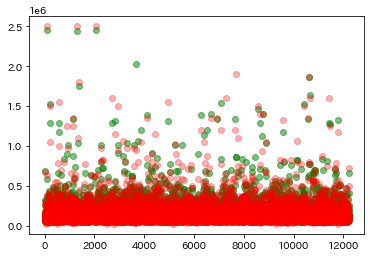

In [16]:
x=[i for i in range(len(test_X))]
y_pred=y_pred_lgb
y_true=test_y
plt.scatter(x=x, y=y_pred, c='green', alpha=0.5)
plt.scatter(x=x, y=test_y, c='red', alpha=0.3)
plt.show()

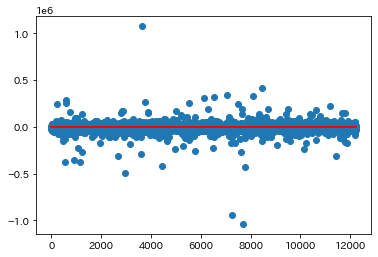

In [17]:
plt.scatter(x=x, y=y_pred-test_y)
x1=np.linspace(0, x)
y1=x1*0
plt.plot(x1,y1, c='red')
plt.show()

In [20]:
error=y_pred-test_y

In [21]:
error_max=np.argmax(error)
print(test_X.iloc[error_max])
print('実際：', test_y.iloc[error_max])
print('予測：', y_pred[error_max])

カテゴリー      賃貸一戸建て
築年数            13
構造              3
階数              1
間取り          2LDK
面積          190.2
23区            港区
都市名           白金６
路線       東京メトロ南北線
最寄駅          白金台駅
徒歩             13
Name: 50597, dtype: object
実際： 950000.0
予測： 2026113.5384113991


In [22]:
error_min=np.argmin(error)
print(test_X.iloc[error_min])
print('実際：', test_y.iloc[error_min])
print('予測：', y_pred[error_min])

カテゴリー     賃貸その他
築年数          41
構造            5
階数            4
間取り          6K
面積       291.58
23区          港区
都市名          芝５
路線        都営三田線
最寄駅         三田駅
徒歩            3
Name: 42684, dtype: object
実際： 1900000.0
予測： 863273.6798106374


In [42]:
# lgb.plot_tree(lgb_model, index=0)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

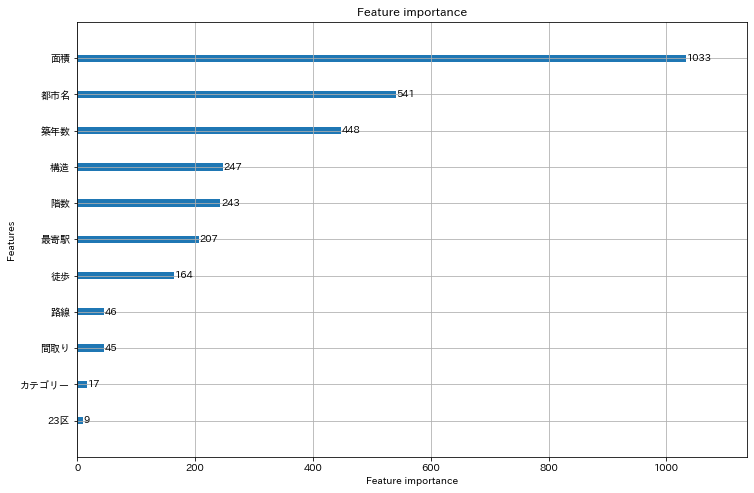

In [23]:
lgb.plot_importance(lgb_model1, figsize=(12,8))

## 量的変数を対数変換 
こうすることで、外れ値の影響を軽減できる 
線形で考えられる

<AxesSubplot:xlabel='賃料', ylabel='Count'>

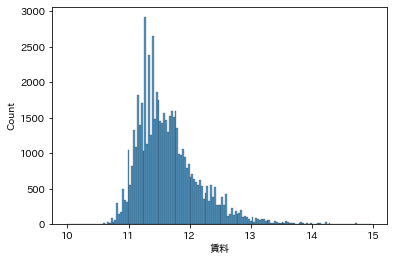

In [45]:
sns.histplot(np.log(y))

In [80]:
np.log2(4294967296)

32.0

<AxesSubplot:xlabel='賃料', ylabel='Count'>

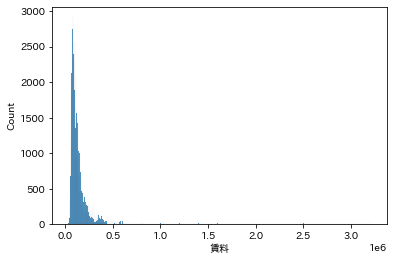

In [46]:
sns.histplot(y)

In [60]:
dataset.columns

Index(['物件名', 'カテゴリー', '築年数', '構造', '階数', '賃料', '管理費', '敷金', '礼金', '間取り', '面積',
       '23区', '都市名', '路線', '最寄駅', '徒歩'],
      dtype='object')

In [114]:
dataset.head()

,物件名,カテゴリー,築年数,構造,階数,賃料,管理費,敷金,礼金,間取り,面積,23区,都市名,路線,最寄駅,徒歩
0,ＪＲ山手線 大崎駅 3階建 築45年,賃貸マンション,45,3,2,109000.0,0.0,109000.0,109000.0,11LDK,40.00,品川区,北品川５,ＪＲ山手線,大崎駅,10
1,ステージグランデ神楽坂,賃貸マンション,12,8,5,100000.0,5000.0,100000.0,100000.0,1K,25.65,新宿区,改代町,東京メトロ有楽町線,江戸川橋駅,3
2,ステージグランデ神楽坂,賃貸マンション,12,8,7,110000.0,5000.0,110000.0,110000.0,1K,25.65,新宿区,改代町,東京メトロ有楽町線,江戸川橋駅,3
3,ステージグランデ神楽坂,賃貸マンション,12,8,8,145000.0,10000.0,145000.0,145000.0,1LDK,41.08,新宿区,改代町,東京メトロ有楽町線,江戸川橋駅,3
4,ステージグランデ神楽坂,賃貸マンション,12,8,1,150000.0,10000.0,0.0,0.0,1SK,41.86,新宿区,改代町,東京メトロ有楽町線,江戸川橋駅,3


In [24]:
def log_trans(df):
    df2=df.copy()
    # 敷金・礼金は○ヶ月に変換
    df2['敷金']=df['敷金']/df['賃料']
    df2['礼金']=df['礼金']/df['賃料']
    
    # 賃料/面積の対数を取る
    df2['log_1平米あたりの賃料']=np.log(df['賃料']/df['面積'])
    
    #面積の対数を取る
    df2['面積']=np.log(df['面積'])
    
    #賃料の対数を取る
    df2['賃料']=np.log(df['賃料'])
    
    return df2

In [25]:
df_trans=log_trans(dataset)
df_trans

,物件名,カテゴリー,築年数,構造,階数,賃料,管理費,敷金,礼金,間取り,面積,23区,都市名,路線,最寄駅,徒歩,log_1平米あたりの賃料
0,ＪＲ山手線 大崎駅 3階建 築45年,賃貸マンション,45,3,2,11.599103,0.0,1.0,1.0,11LDK,3.688879,品川区,北品川５,ＪＲ山手線,大崎駅,10,7.910224
1,ステージグランデ神楽坂,賃貸マンション,12,8,5,11.512925,5000.0,1.0,1.0,1K,3.244544,新宿区,改代町,東京メトロ有楽町線,江戸川橋駅,3,8.268382
2,ステージグランデ神楽坂,賃貸マンション,12,8,7,11.608236,5000.0,1.0,1.0,1K,3.244544,新宿区,改代町,東京メトロ有楽町線,江戸川橋駅,3,8.363692
3,ステージグランデ神楽坂,賃貸マンション,12,8,8,11.884489,10000.0,1.0,1.0,1LDK,3.715521,新宿区,改代町,東京メトロ有楽町線,江戸川橋駅,3,8.168968
4,ステージグランデ神楽坂,賃貸マンション,12,8,1,11.918391,10000.0,0.0,0.0,1SK,3.734331,新宿区,改代町,東京メトロ有楽町線,江戸川橋駅,3,8.184060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61103,ビレッジハウス八潮2,賃貸マンション,38,16,3,11.626254,0.0,0.0,0.0,3DK,4.120986,品川区,八潮５,りんかい線,品川シーサイド駅,6,7.505268
61104,ビレッジハウス八潮3,賃貸マンション,38,16,14,11.678440,0.0,0.0,0.0,3DK,4.120986,品川区,八潮５,りんかい線,品川シーサイド駅,6,7.557453
61105,原町アパート,賃貸アパート,54,2,1,11.002100,0.0,1.0,0.0,ワンルーム,3.121483,新宿区,原町３,東京メトロ東西線,神楽坂駅,20,7.880616
61106,原町アパート,賃貸アパート,54,2,1,11.002100,0.0,1.0,0.0,ワンルーム,3.013572,新宿区,原町３,東京メトロ東西線,神楽坂駅,20,7.988528


In [26]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61108 entries, 0 to 61107
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   物件名            61108 non-null  category
 1   カテゴリー          61108 non-null  category
 2   築年数            61108 non-null  int64   
 3   構造             61108 non-null  int64   
 4   階数             61108 non-null  int64   
 5   賃料             61108 non-null  float64 
 6   管理費            61108 non-null  float64 
 7   敷金             61108 non-null  float64 
 8   礼金             61108 non-null  float64 
 9   間取り            61108 non-null  category
 10  面積             61108 non-null  float64 
 11  23区            61108 non-null  category
 12  都市名            61108 non-null  category
 13  路線             61108 non-null  category
 14  最寄駅            61108 non-null  category
 15  徒歩             61108 non-null  int64   
 16  log_1平米あたりの賃料  61108 non-null  float64 
dtypes: category(7), float64(6), int

In [38]:
#目的変数
y2=df_trans[['log_1平米あたりの賃料', '賃料']]
y_tmp=df_trans['log_1平米あたりの賃料']
y_finalized=df_trans['賃料']

#説明変数
X_trans=df_trans.drop(['物件名','敷金', '礼金', '管理費', 'log_1平米あたりの賃料', '賃料'], axis=1)

In [39]:
#訓練用、検証用、テスト用に分割
train_val_X2, test_X2, train_val_y2, test_y2=train_test_split(X_trans, y_tmp, test_size=0.2, random_state=20221006)
train_X2, val_X2, train_y2, val_y2=train_test_split(train_val_X2, train_val_y2, test_size=0.2, random_state=20221006)

In [40]:
trains2=lgb.Dataset(train_X2, train_y2)
vals2=lgb.Dataset(val_X2, val_y2)

# # 固定するパラメータ
# params2 = {
# #     "boosting_type": "gbdt",
#     'objective': 'regression_l1',
#     'metric': 'l1',
# #     "verbosity": 100,
#     "num_iterations": 10000
# }

# # Optunaでのパラメータ探索
# model2 = lgb_o.train(params2, trains2, 
#                   valid_sets=[trains2, vals2],
#                   num_boost_round=10000,
#                   verbose_eval=-1,
#                   early_stopping_rounds=100,
#                  )

In [42]:
# params2=model2.params
# params2

In [43]:
params2={
 'objective': 'regression_l1',
 'metric': 'l1',
 'feature_pre_filter': False,
 'lambda_l1': 1.484962822542604e-08,
 'lambda_l2': 1.4596014115211737e-08,
 'num_leaves': 255,
 'feature_fraction': 0.58,
 'bagging_fraction': 0.6807002018864656,
 'bagging_freq': 7,
 'min_child_samples': 5,
 'num_iterations': 10000,
 'early_stopping_round': 100,
 'categorical_column': [0, 7, 9, 10, 11, 12]
}

In [44]:
lgb_model2=lgb.train(params2, trains2, valid_sets=[trains2,vals2], 
                    num_boost_round=15000, early_stopping_rounds=100, verbose_eval=100)

/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-0128/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/Shota-

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1145
[LightGBM] [Info] Number of data points in the train set: 39108, number of used features: 11
[LightGBM] [Info] Start training from score 8.298396
Training until validation scores don't improve for 100 rounds
[100]	training's l1: 0.0486745	valid_1's l1: 0.0615551
[200]	training's l1: 0.0398136	valid_1's l1: 0.0564697
[300]	training's l1: 0.0351285	valid_1's l1: 0.0540055
[400]	training's l1: 0.0319397	valid_1's l1: 0.052321
[500]	training's l1: 0.0296421	valid_1's l1: 0.0510846
[600]	training's l1: 0.0278176	valid_1's l1: 0.0501805
[700]	training's l1: 0.0264237	valid_1's l1: 0.0494473
[800]	training's l1: 0.0252406	valid_1's l1: 0.0488307
[900]	training's l1: 0.024249	valid_1's l1: 0.0483687
[1000]	training's l1: 0.0233952	vali

In [45]:
from sklearn.metrics import mean_absolute_error

y_pred_lgb2=lgb_model2.predict(test_X2)
print('1平米あたりの価格(log)：', mean_absolute_error(y_true=test_y2, y_pred=y_pred_lgb2))
print('1平米あたりの価格：',np.exp(mean_absolute_error(y_true=test_y2, y_pred=y_pred_lgb2)))

1平米あたりの価格(log)： 0.04121571070347652
1平米あたりの価格： 1.0420768684370945


In [131]:
# test_y2

In [132]:
# y_pred_lgb2=lgb_model2.predict(test_X2)
# y_pred_lgb2

In [46]:
#訓練用、検証用、テスト用に分割
train_val_yf2, test_yf2=train_test_split(y_finalized, test_size=0.2, random_state=20221006)
train_yf2, val_yf2=train_test_split(train_val_yf2, test_size=0.2, random_state=20221006)

In [47]:
yf_pred_lgb2=y_pred_lgb2+test_X2['面積']

print('予測価格(log)の評価：', mean_absolute_error(y_true=test_yf2, y_pred=yf_pred_lgb2))
print('予測価格の評価：',np.exp(mean_absolute_error(y_true=test_yf2, y_pred=yf_pred_lgb2)))

予測価格(log)の評価： 0.0412157107034765
予測価格の評価： 1.0420768684370945


In [48]:
mean_absolute_error(np.exp(yf_pred_lgb2),np.exp(test_yf2))

5872.887879301261

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

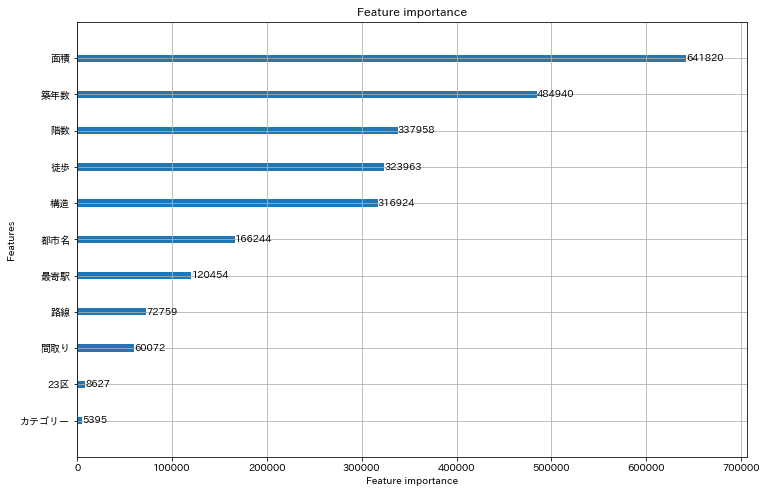

In [63]:
lgb.plot_importance(lgb_model2, figsize=(12,8))

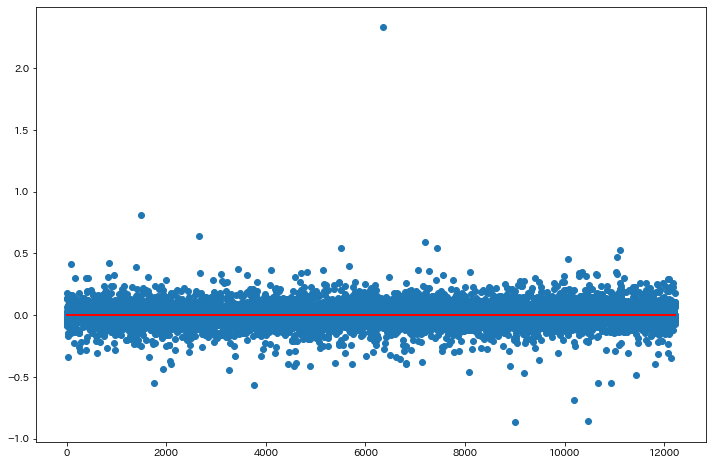

In [64]:
x=[i for i in range(len(test_X))]
plt.figure(figsize=(12,8))
plt.scatter(x=x, y=yf_pred_lgb2-test_yf2)
x1=np.linspace(0, x)
y1=x1*0
plt.plot(x1,y1, c='red')
plt.show()

In [65]:
np.argmax(yf_pred_lgb2-test_yf2)

6360

In [66]:
test_X2.iloc[6360]

カテゴリー     賃貸マンション
築年数            16
構造              4
階数              3
間取り            1K
面積       5.447384
23区           新宿区
都市名          北新宿１
路線          ＪＲ中央線
最寄駅          大久保駅
徒歩              6
Name: 34472, dtype: object

In [67]:
test_y2.iloc[6360]

5.9601812348464716

In [68]:
yf_pred_lgb2.iloc[6360]

13.742335484093847

In [82]:
# dataset['敷金'].sort_values().unique()

In [83]:
# sikikin=dataset['敷金']/dataset['賃料']
# sns.histplot(sikikin)

In [84]:
# np.argmax(sikikin)

In [85]:
# dataset.iloc[20183]

In [86]:
# reikin=dataset['礼金']/dataset['賃料']
# sns.histplot(reikin)